 
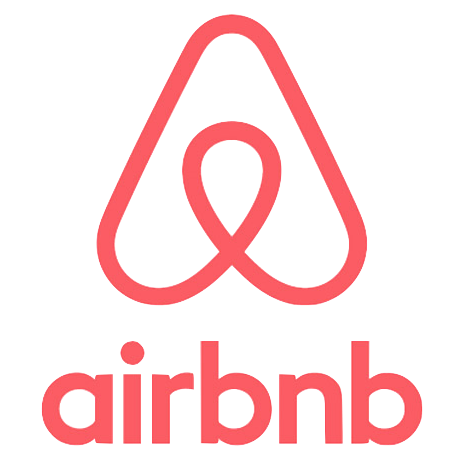

<a id="intro"></a>
## This notebook contains data obtained from Airbnb Seattle. Airbnb is one of the leading companies in the travel domain. We aim to explore trends in this data to get a deeper understanding by doing an in-depth analysis of the data. 

### The data will be explored implementing Cross-Industry Standard Process for Data Mining better known as CRISP-DM. The CRISP-Dm process is comprised from six steps:

#### 1.Business Understanding
#### 2.Data Understanding
#### 3.Data Preparation
#### 4.Modelling
#### 5.Evaluation
#### 6.Deployment

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#Plotting Libaries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modelling Libraries
import unittest
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statistical_tests as t
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import fbeta_score, confusion_matrix, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import export_graphviz
import itertools
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from datetime import datetime,timedelta
import os

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/siddharthamahendra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<a id="useless"> </a>

## 2. Data Understanding

In [2]:
#Importing Data
calendar = pd.read_csv('/Users/siddharthamahendra/Downloads/Airbnb Data/calendar.csv')
listings = pd.read_csv('/Users/siddharthamahendra/Downloads/Airbnb Data/listings.csv')
reviews= pd.read_csv('/Users/siddharthamahendra/Downloads/Airbnb Data/reviews.csv')

<a id="unnecessary"></a>
### Exploring Calendar Dataset

In [3]:
calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
calendar['month']=pd.to_datetime(calendar['date']).dt.month
calendar['year']=pd.to_datetime(calendar['date']).dt.year
calendar['day']=pd.to_datetime(calendar['date']).dt.day
calendar['date']=pd.to_datetime(calendar['date'])

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
#Exploring Listings Dataset
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
#Exploring Reviews Dataset
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<a id="Clean and Explore"></a>
### Cleaning and Exploring Data

<a id="Missing"></a>
### Missing Values

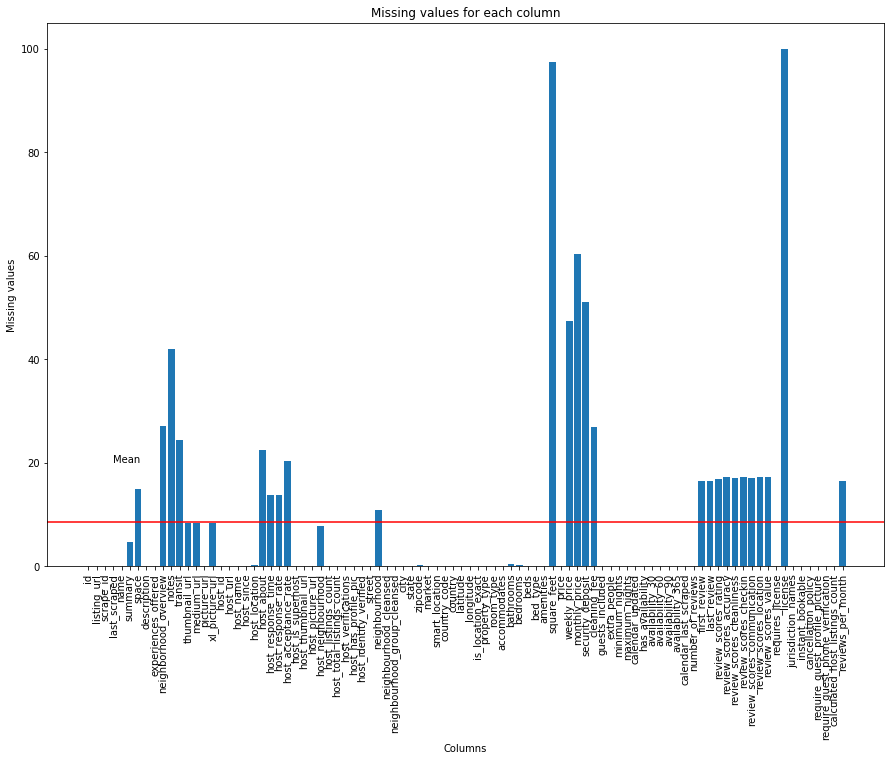

In [10]:
#Plotting Missing Values
missing_values = [(listings[series].isnull().sum()/len(listings[series]))*100 for series in list(listings) ]
headers_missing = [series for series in list(listings)  ]

mean = np.mean(missing_values)
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Missing values for each column")
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.axhline(y=mean, c='r', label='"Mean"')

ax.annotate('Mean', xy=(0, mean), xytext=(3, 20),
            )
plt.bar(headers_missing, missing_values)
plt.xticks(rotation=90);

<a id="unnecessary"></a>
### Removing "$" sign and converting prices to float64

In [11]:
listings['price']=listings['price'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)
calendar['price']=calendar['price'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)

In [12]:
listings['cleaning_fee']=listings['cleaning_fee'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)
listings['security_deposit']=listings['security_deposit'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)

In [13]:
listings['weekly_price']=listings['weekly_price'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)
listings['monthly_price']=listings['monthly_price'].str.replace("$","").str.replace(",","").apply(pd.to_numeric)

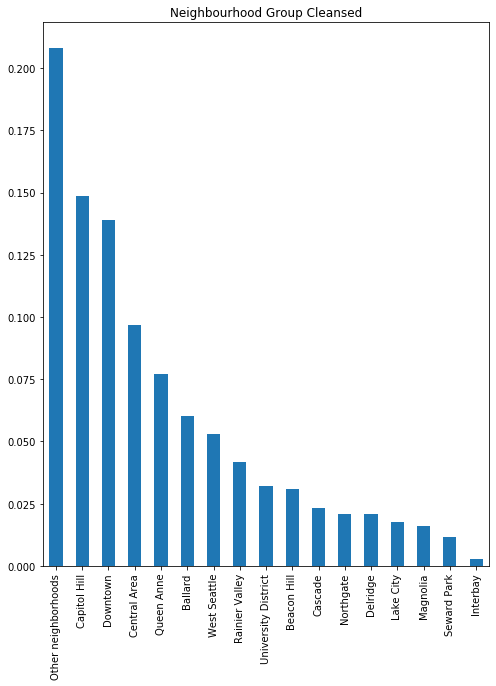

In [14]:
#Plotting Neighbourhood wise Division
((listings['neighbourhood_group_cleansed'].value_counts())/listings.shape[0]).plot(kind="bar",figsize=(8,10));
plt.title("Neighbourhood Group Cleansed");

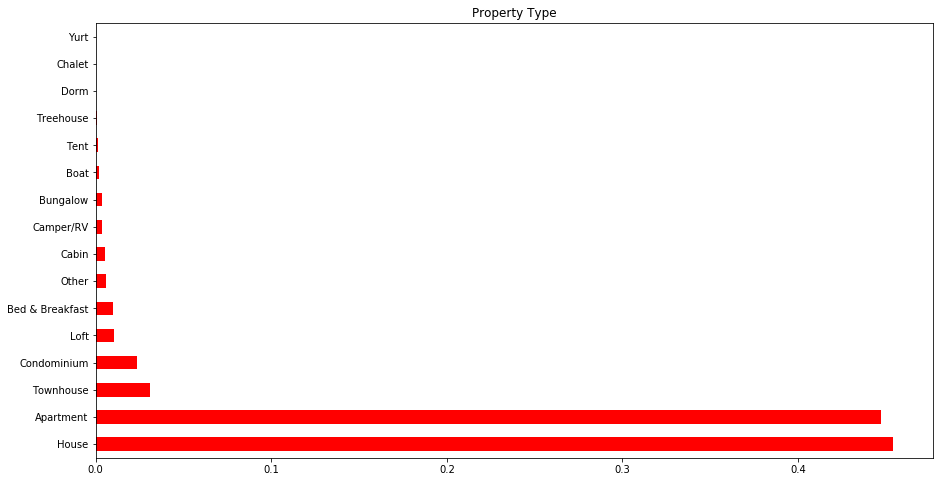

In [15]:
prop_vals = listings['property_type'].value_counts()
(prop_vals/listings.shape[0]).plot(kind="barh",figsize=(15,8),color='red');
plt.title("Property Type");

<a id="unnecessary"></a>
## The most popular accomodations are Houses and Apartments

In [16]:
#Exploring Listings NaN values first bedroom then bathroom 
listings[listings.bedrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1429,1476298,https://www.airbnb.com/rooms/1476298,20160104002432,2016-01-04,Live like a local - Walkscore 98!,NaN,You will love the location! Heart of Downtown....,You will love the location! Heart of Downtown....,none,The heart of Seattle's downtown,...,9.0,f,NaN,WASHINGTON,t,strict,t,t,5,5.82
1492,604600,https://www.airbnb.com/rooms/604600,20160104002432,2016-01-04,condo in seattle,studio (2 ppl) through 2 bedroom units (6 ppl)...,Please send message for availability. Price is...,studio (2 ppl) through 2 bedroom units (6 ppl)...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,0.06
1493,1251763,https://www.airbnb.com/rooms/1251763,20160104002432,2016-01-04,Studio Plus timeshare in Seattle WA,*** When booking a Friday or Saturday night st...,*Important: Contact me to tell me your preferr...,*** When booking a Friday or Saturday night st...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,4,0.08
1853,17951,https://www.airbnb.com/rooms/17951,20160104002432,2016-01-04,"West Seattle, The Starlight Studio",Our spacious studio accommodates two guests. ...,In the front alcove is a queen-sized Sleep Num...,Our spacious studio accommodates two guests. ...,none,NaN,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,3,0.31
2619,948077,https://www.airbnb.com/rooms/948077,20160104002432,2016-01-04,Capitol Hill Stylish Garden Cottage,"Small Space, Big Style, Spectacular Location w...","Small Space, Big Style, Spectacular Location w...","Small Space, Big Style, Spectacular Location w...",none,*The location on the west slope of Capitol Hil...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.28
2915,3272374,https://www.airbnb.com/rooms/3272374,20160104002432,2016-01-04,"Quiet, charming studio with parking",This large studio apartment comfortably fits t...,My studio apartment is in a gorgeous old build...,This large studio apartment comfortably fits t...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,2,1.06


In [17]:
listings[listings.bathrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1242,19611,https://www.airbnb.com/rooms/19611,20160104002432,2016-01-04,1 Bedroom Downtown Seattle Oasis,This central unit is perfect for anyone lookin...,Seattle Oasis Vacations proudly offer this wel...,This central unit is perfect for anyone lookin...,none,NaN,...,8.0,f,NaN,WASHINGTON,f,strict,t,t,6,0.37
1314,59827,https://www.airbnb.com/rooms/59827,20160104002432,2016-01-04,1 Bedroom Sweeping View Oasis,NaN,"Welcome to Seattle Oasis Vacations, your home ...","Welcome to Seattle Oasis Vacations, your home ...",none,NaN,...,8.0,f,NaN,WASHINGTON,t,strict,t,t,6,0.21
1357,19623,https://www.airbnb.com/rooms/19623,20160104002432,2016-01-04,2 Bedroom Downtown Seattle Oasis,NaN,Seattle Oasis Vacations proudly offer this wel...,Seattle Oasis Vacations proudly offer this wel...,none,NaN,...,8.0,f,NaN,WASHINGTON,t,strict,t,t,6,0.54
1378,224763,https://www.airbnb.com/rooms/224763,20160104002432,2016-01-04,"SALE! WiFi Luxurious, Parking Inc",Last minute mid week sale!!!,Luxurious condominium in Seattle's best locati...,Last minute mid week sale!!! Luxurious condomi...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.56
1961,609252,https://www.airbnb.com/rooms/609252,20160104002432,2016-01-04,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,2,NaN
1975,716829,https://www.airbnb.com/rooms/716829,20160104002432,2016-01-04,Shack in the back in Seattle,"Quiet and cozy, great smells from cedar ceilin...","The ""shack"" is behind the ski chalet which is ...","Quiet and cozy, great smells from cedar ceilin...",none,NaN,...,8.0,f,NaN,WASHINGTON,f,flexible,f,f,4,0.03
2048,354453,https://www.airbnb.com/rooms/354453,20160104002432,2016-01-04,Greenwood 1926 Craftsman,"All wood interior, chandeliers, big kitchen, l...","Lovely craftsman home with all hardwoods, larg...","All wood interior, chandeliers, big kitchen, l...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
2096,143580,https://www.airbnb.com/rooms/143580,20160104002432,2016-01-04,N. Beacon Hill- Super Private Room,NaN,Hi! We are Jana and Nick and we'd love to have...,Hi! We are Jana and Nick and we'd love to have...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,4.31
2306,774659,https://www.airbnb.com/rooms/774659,20160104002432,2016-01-04,Jake's Place: A Modern Guesthouse,NaN,This guest house was built from the ground up ...,This guest house was built from the ground up ...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.08
2408,10385,https://www.airbnb.com/rooms/10385,20160104002432,2016-01-04,Upscale Seattle Hotel Alternative,NaN,"Located in Seattle, this is a cozy, clean and ...","Located in Seattle, this is a cozy, clean and ...",none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,5,0.97


<a id="unnecessary"></a>
### We should probaby drop these as they won't add any value to the analysis as prediciting without the bedroom and bathroom will be very difficult

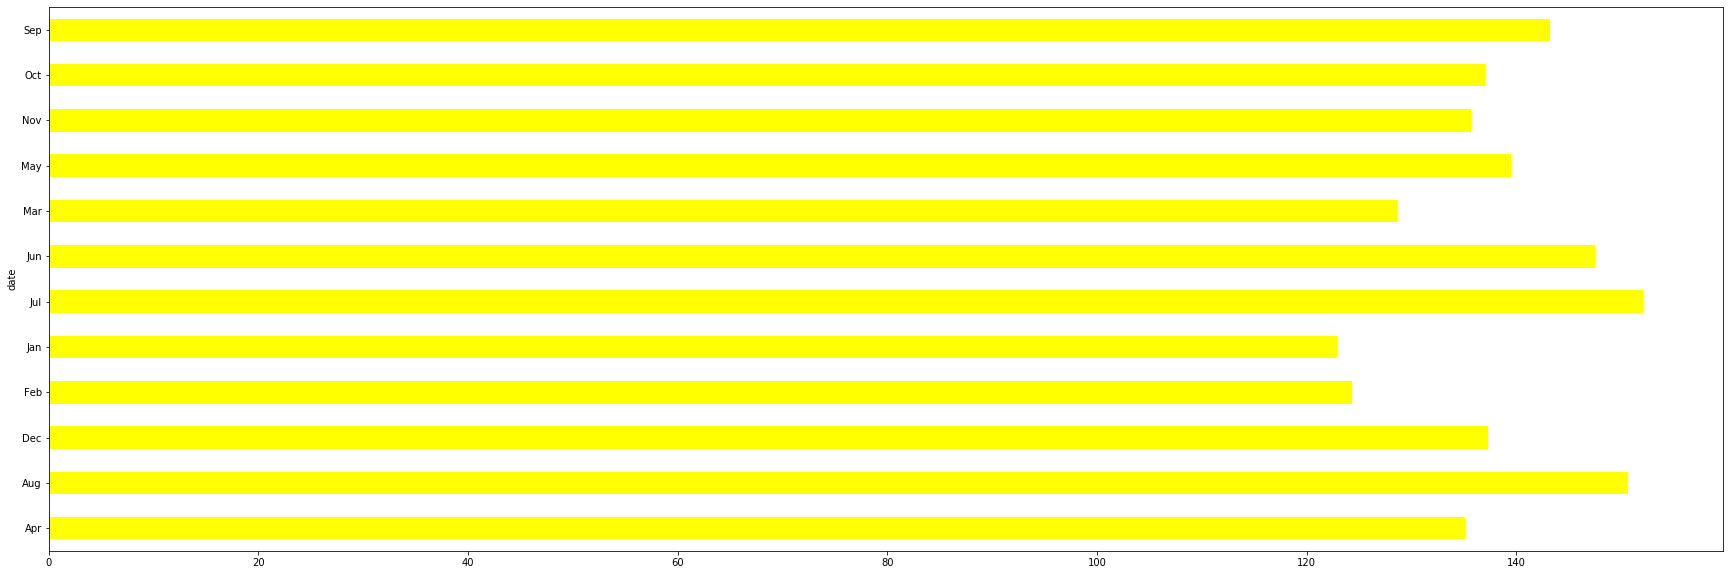

In [18]:
monthly_agg_prices = calendar.groupby(calendar['date'].dt.strftime('%b'))['price'].mean()
monthly_agg_prices.plot(kind = 'barh' , figsize = (30,10),color='yellow')

<a id="unnecessary"></a>
## To detect Peak Season we plot the monthly graph Jun-July seems to be the peak season along with August

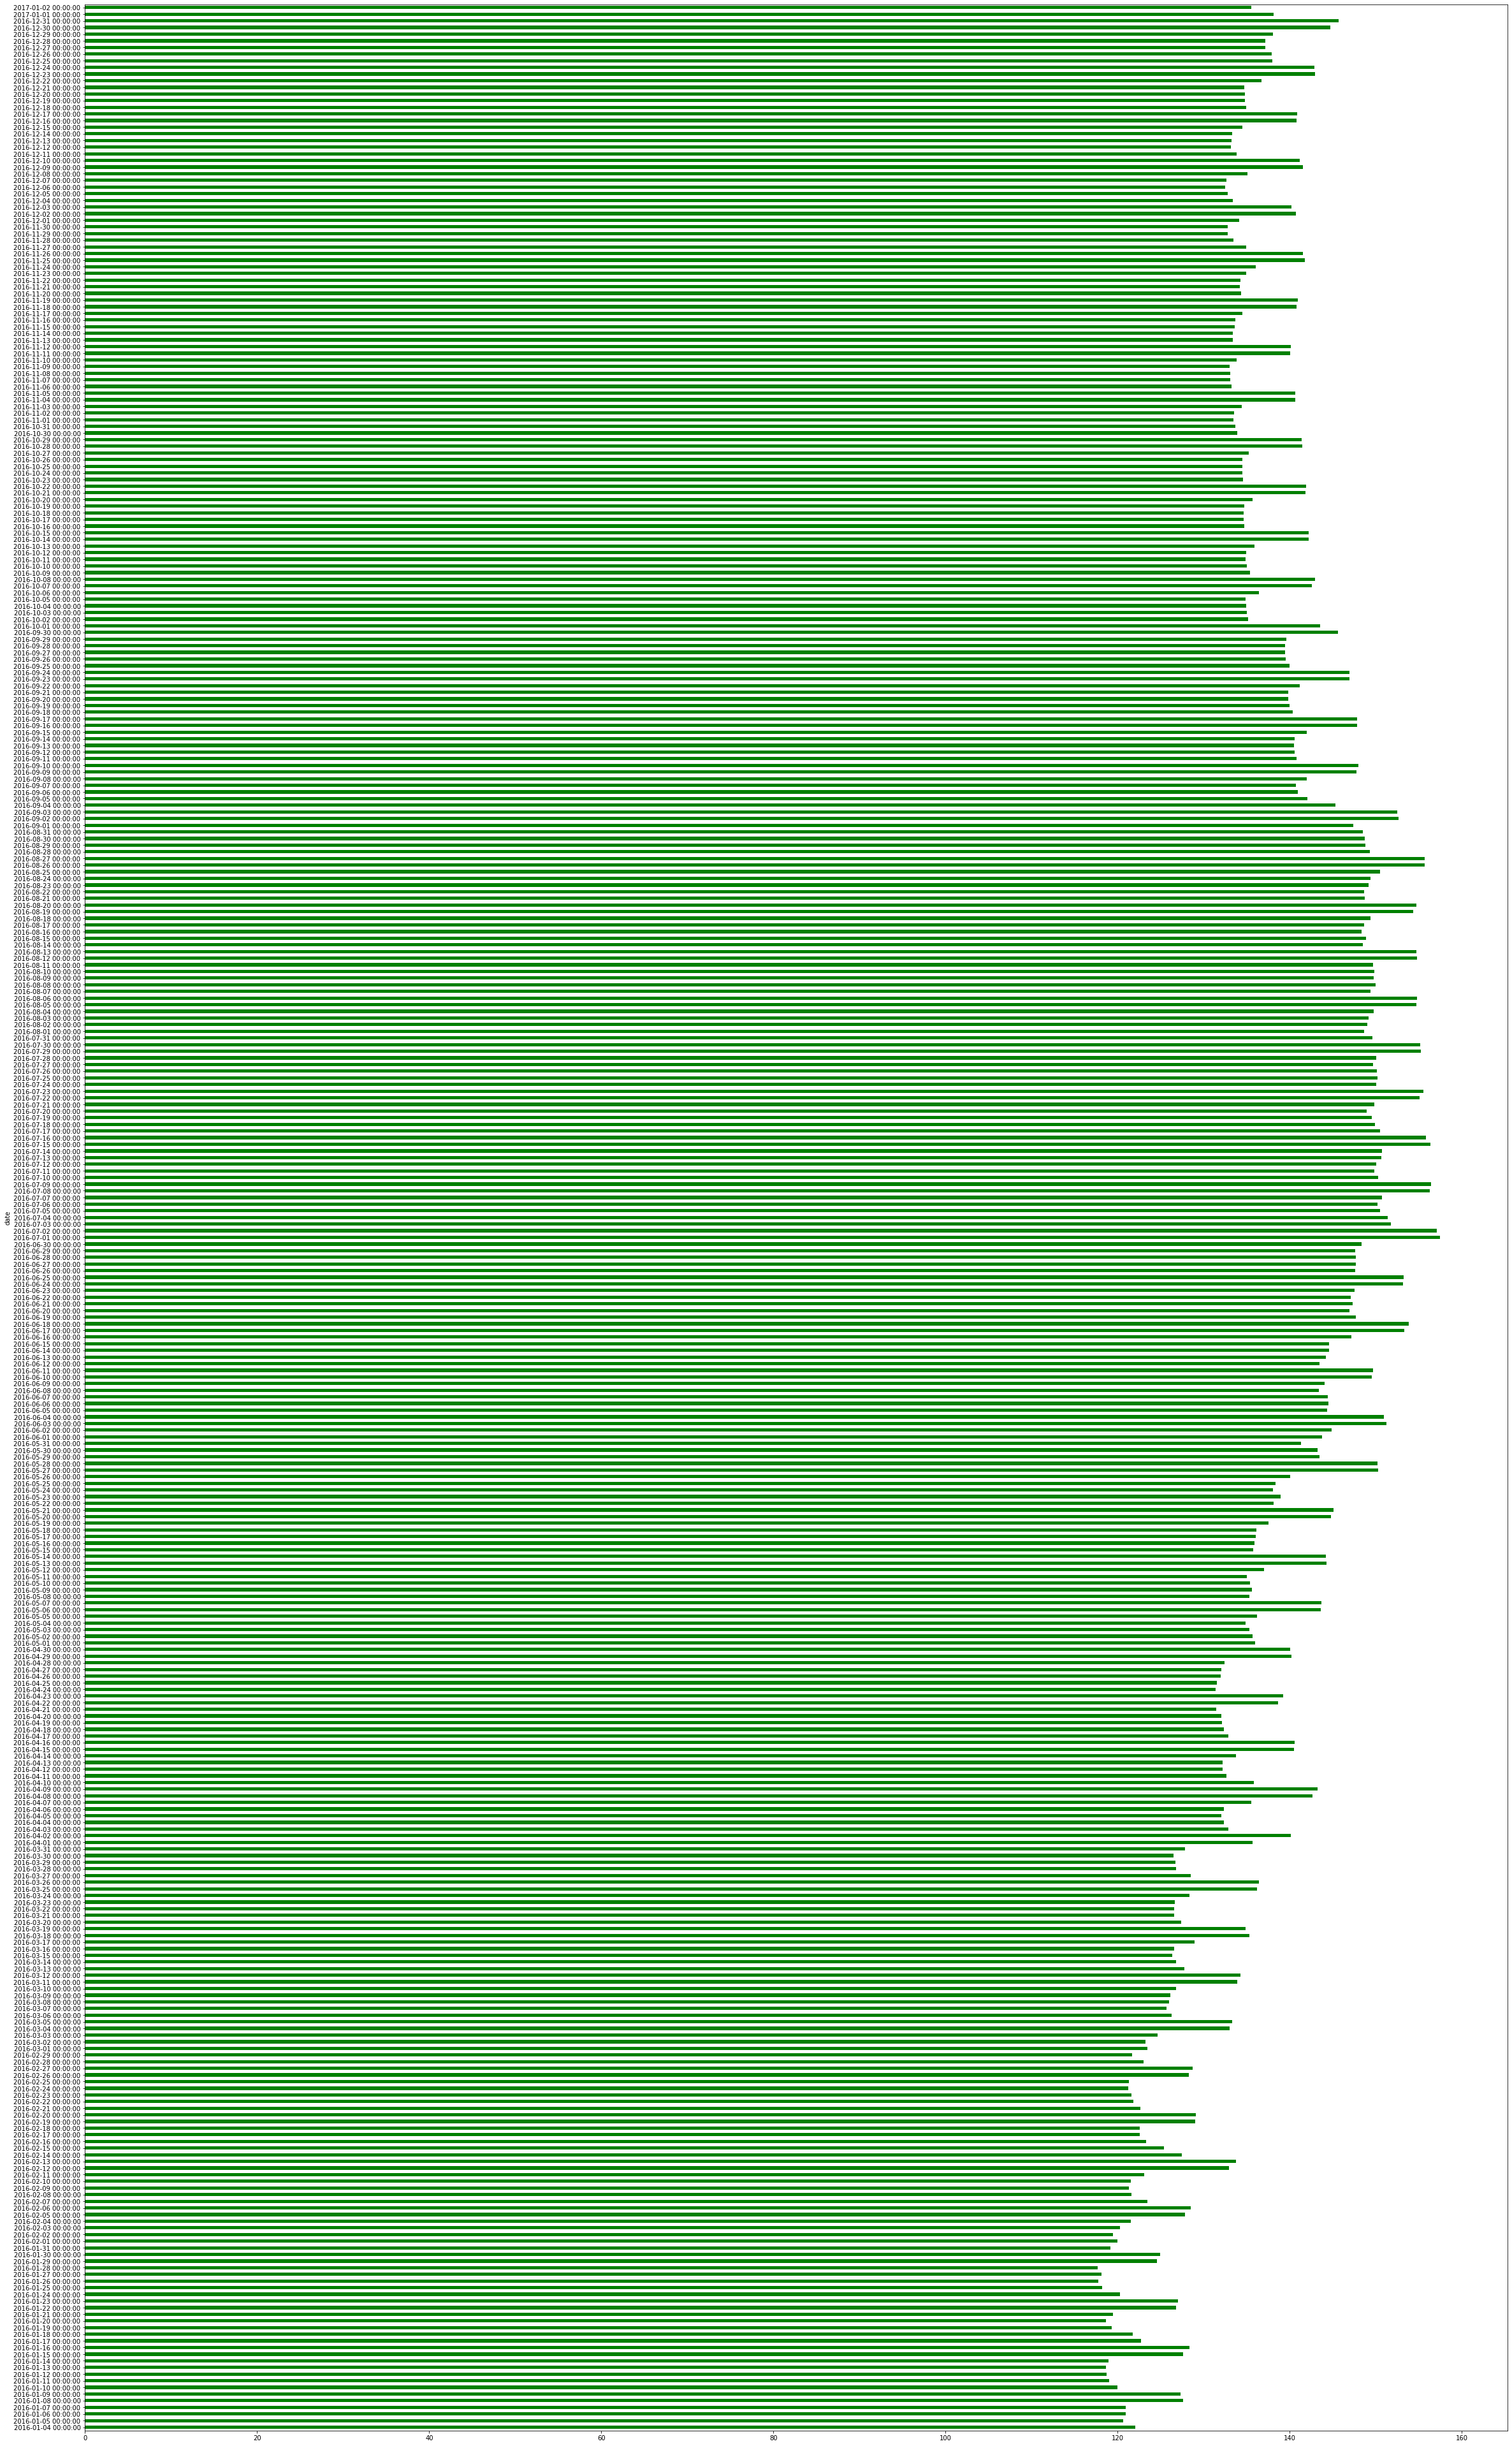

In [19]:
daily_agg_prices=calendar.groupby(calendar['date'])['price'].mean()

daily_agg_prices.plot(kind = 'barh' , figsize = (40,70),color='green')

<a id="unnecessary"></a>

### As we can clearly see in this daily plot of values the listings seem to be pricier on the weekends




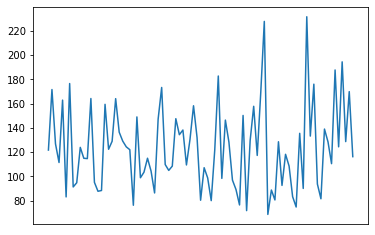

In [20]:
listings.groupby('neighbourhood_cleansed')['price'].mean().plot().get_xaxis().set_visible(False)

In [21]:
top_neighbourhoods=listings.groupby('neighbourhood_cleansed')['price'].mean()

In [22]:
top_neighbourhoods.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

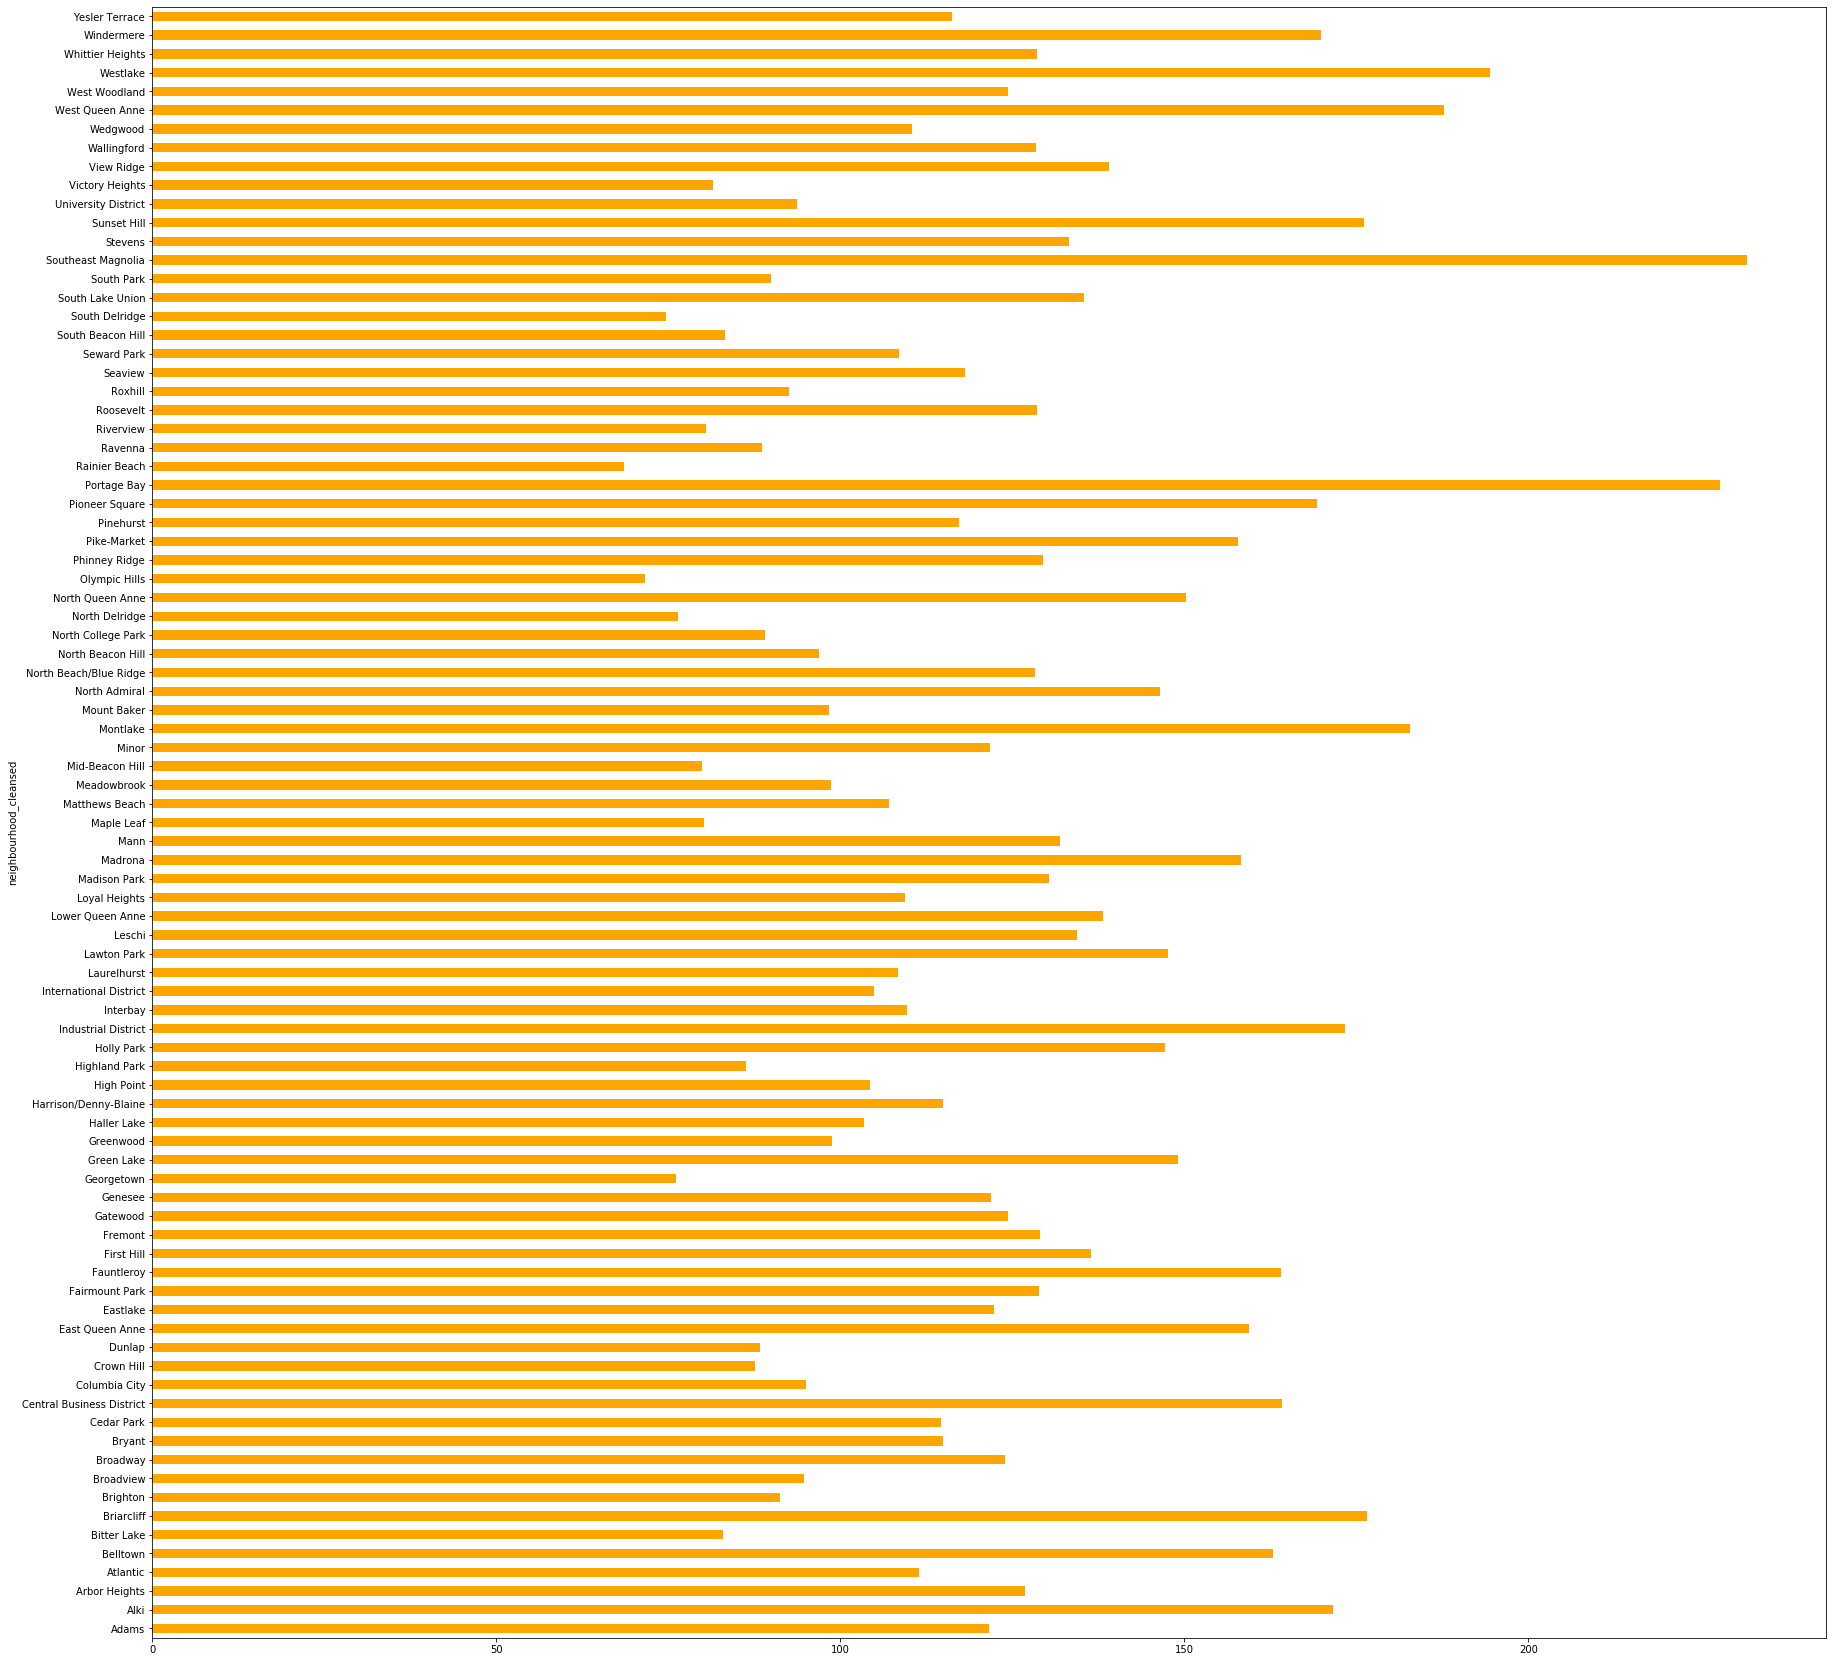

In [23]:
top_neighbourhoods.plot(kind='barh',color='orange',figsize=(30,30))

<a id="unnecessary"></a>
## Bar Graph of the Priciest Neighbourhood
### South East Magnolia is the most expensive followed by Portrage Bay and WestLake

listings.info()

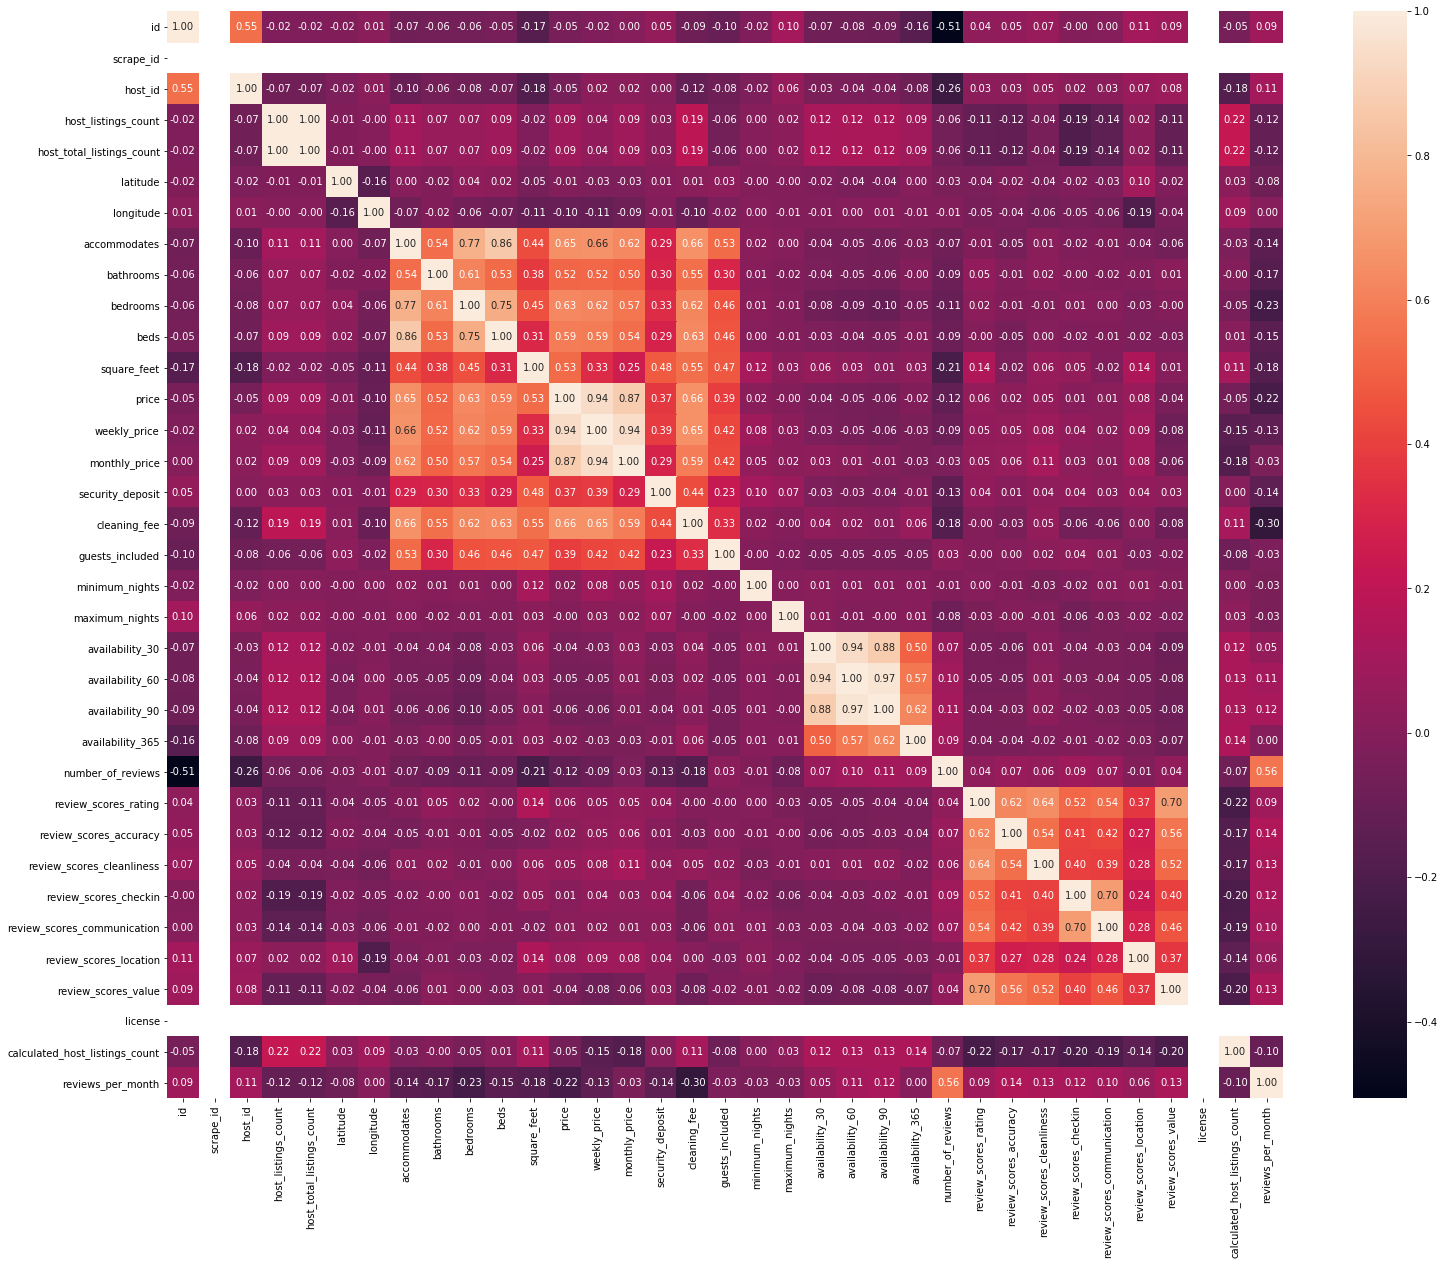

In [24]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(listings.corr(), annot=True, fmt='.2f');

<a id="unnecessary"></a>
## Sentiment Anlaysis of Reviews

In [25]:
reviews1=reviews[['listing_id','comments']].copy()

In [26]:
def neighbourhood_finder(listing_id):
    neighbourhood=listings[listings['id']==listing_id]['neighbourhood_cleansed'].iloc[0]
    return neighbourhood

In [27]:
reviews1['neighbourhood']=reviews1['listing_id'].apply(neighbourhood_finder)

<a id="unnecessary"></a>
## Vader Scores

In [28]:
sent_analyzer= SentimentIntensityAnalyzer()

def sentiment_scores(review):
    review=str(review)
    score=sent_analyzer.polarity_scores(review)
    return score['compound']
                                        

In [29]:
reviews1['vader_score']=reviews1['comments'].apply(sentiment_scores)

In [30]:
reviews1

,listing_id,comments,neighbourhood,vader_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783
...,...,...,...,...
84844,3624990,The description and pictures of the apartment ...,First Hill,0.9498
84845,3624990,We had an excellent stay. It was clean and com...,First Hill,0.8658
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del...",First Hill,0.0000
84847,3624990,"Very good apartement, clean and well sized. Si...",First Hill,0.7468


In [31]:
top_neighbourhoods_by_reviews= reviews1.groupby('neighbourhood')['vader_score'].mean()

In [32]:
top_neighbourhoods_by_reviews.head(10)

neighbourhood
Adams            0.904702
Alki             0.885358
Arbor Heights    0.937228
Atlantic         0.874670
Belltown         0.871454
Bitter Lake      0.849747
Briarcliff       0.879674
Brighton         0.881703
Broadview        0.889979
Broadway         0.874310
Name: vader_score, dtype: float64

In [33]:
top_neighbourhoods.head(10)

neighbourhood_cleansed
Adams            121.671429
Alki             171.619048
Arbor Heights    126.800000
Atlantic         111.396226
Belltown         162.893162
Bitter Lake       83.000000
Briarcliff       176.571429
Brighton          91.230769
Broadview         94.705882
Broadway         123.889169
Name: price, dtype: float64

In [34]:
top_neighbourhoods_by_reviews.index

Index(['Adams', 'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake',
       'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Cedar Park', 'Central Business District', 'Columbia City',
       'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake', 'Fairmount Park',
       'Fauntleroy', 'First Hill', 'Fremont', 'Gatewood', 'Genesee',
       'Georgetown', 'Green Lake', 'Greenwood', 'Haller Lake',
       'Harrison/Denny-Blaine', 'High Point', 'Highland Park', 'Holly Park',
       'Industrial District', 'Interbay', 'International District',
       'Laurelhurst', 'Lawton Park', 'Leschi', 'Lower Queen Anne',
       'Loyal Heights', 'Madison Park', 'Madrona', 'Mann', 'Maple Leaf',
       'Matthews Beach', 'Meadowbrook', 'Mid-Beacon Hill', 'Minor', 'Montlake',
       'Mount Baker', 'North Admiral', 'North Beach/Blue Ridge',
       'North Beacon Hill', 'North College Park', 'North Delridge',
       'North Queen Anne', 'Olympic Hills', 'Phinney Ridge', 'Pike-Market',

<a id="unnecessary"></a>
## In the following plot we analyse if the cost of the neighbourhood plays a role in the reviews 

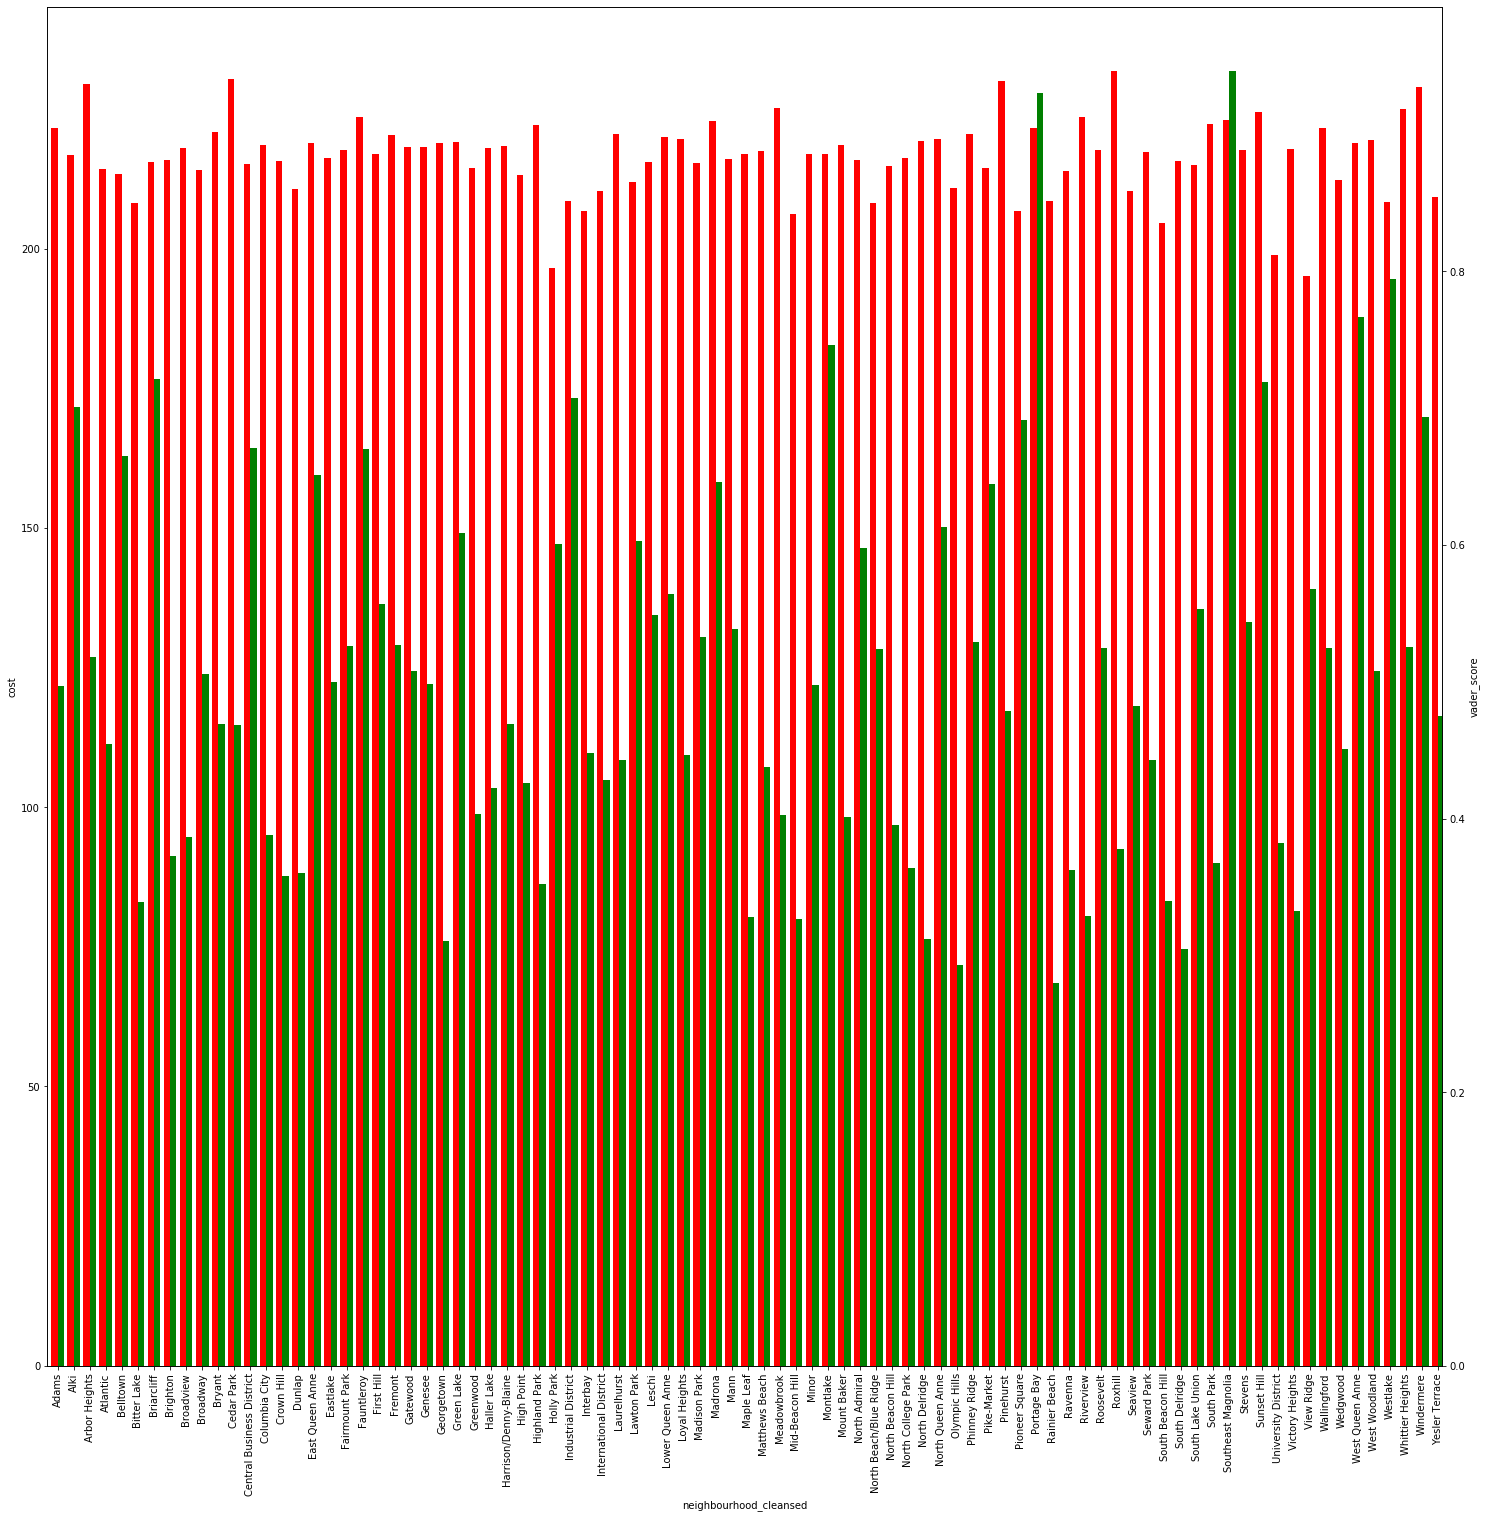

In [35]:
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('cost')
ax2.set_ylabel('vader_score')
width=0.4
top_neighbourhoods.plot(kind='bar',color='green',ax=ax1,width=width,position=0)
top_neighbourhoods_by_reviews.plot(kind='bar',color='red',ax=ax2,width=width,position=1)

<a id="unnecessary"></a>
## The plot clearly shows there is no direct relationship between the prices in the neighbourhood and the reviews

In [36]:
listings['neighbourhood_cleansed'].nunique()

87

In [37]:
count=0
top_neighbourhoods= top_neighbourhoods.sort_values(ascending=False)
top_neighbourhoods_by_reviews=top_neighbourhoods_by_reviews.sort_values(ascending=False).head(10)
for i in range(10):
    if top_neighbourhoods.index[i] in top_neighbourhoods_by_reviews.index:
        print(top_neighbourhoods.index[i])
        count +=1
       

count

Sunset Hill
Windermere


2

<a id="unnecessary"></a>
### Building on the previous analysis we just comapred the top 10 neighbourhoods by price and the top 10 neighbourhoods by reviews and found that the relationship is very weak as only 2 out of the top 10 neighbourhoods in the respective categories are common

<a id="unnecessary"></a>

<a id="unnecessary"></a>
### In the following plot we analyse if there is a relationship between the reviews obtained by Regular vs Super Hosts. 
### We will be delving deeper into the Regular Hosts vs Super Hosts analysis a little later in the notebook.

In [43]:
superhosts_reviews = super_hosts[['number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month']].dropna(subset=['review_scores_rating'])
regularhosts_reviews = regular_hosts[['number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month']].dropna(subset=['review_scores_rating'])

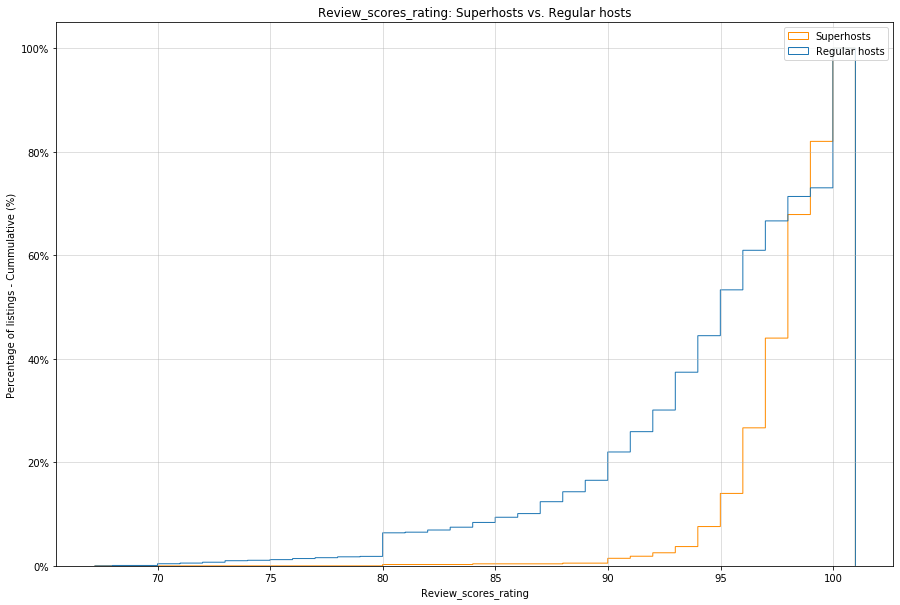

In [44]:
t.cummulative_hist(regularhosts_reviews, superhosts_reviews, 'review_scores_rating', 0.01,xmin=min(superhosts_reviews['review_scores_rating'].quantile(0.01), regularhosts_reviews['review_scores_rating'].quantile(0.01)))

<a id="unnecessary"></a>

<a id="unnecessary"></a>
## Super Hosts vs Regular Hosts

### This aspect of the analysis has always intrigued me. I've always wanted to understand that  if Super Hosts have an edge over Regular Hosts and do they exploit their badge to charge higher for the listings.

In [39]:
listings[listings.host_is_superhost.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


#### Due to such high amount of nan values makes logial sense to drop these rows

In [40]:
listings['total_price'] = (listings['price'] + (listings['cleaning_fee'].fillna(0)))
listings['sec_price'] = (listings['total_price'] + (listings['security_deposit'].fillna(0)))

In [41]:
super_hosts = listings[listings['host_is_superhost'] == 't']

regular_hosts = listings[listings['host_is_superhost'] == 'f']

print ("Of all the hosts in Seattle {:.2f} % are Super Hosts".format(super_hosts.shape[0]/(super_hosts.shape[0]+regular_hosts.shape[0])*100))

Of all the hosts in Seattle 20.39 % are Super Hosts


In [42]:
print('Superhosts price + cleaning fee + security deposit: Min. USD {:.2f}, Max. USD {:.2f}'.format(min(super_hosts['sec_price']), max(super_hosts['sec_price'])))


print('Regular hosts price + cleaning fee + security deposit: Min. USD {:.2f}, Max. USD {:.2f}'.format(min(regular_hosts['sec_price']), max(regular_hosts['sec_price'])))


Superhosts price + cleaning fee + security deposit: Min. USD 38.00, Max. USD 2050.00
Regular hosts price + cleaning fee + security deposit: Min. USD 20.00, Max. USD 5350.00


In [45]:
superhost_mean = pd.DataFrame(super_hosts[['total_price','sec_price','price','weekly_price',"monthly_price"]].mean())

In [46]:
regularhosts_mean = pd.DataFrame(regular_hosts[['total_price','sec_price','price','weekly_price',"monthly_price"]].mean())

<a id="unnecessary"></a>
## To understand this better I conducted multiple Two Tailed Statistical Significance Test to understand if there is a difference in prices of Super Hosts and Regular Hosts for listings

In [47]:
print('\033[1m' 'Two-tailed Statistical Significance Test (alpha = 0.01):''\033[0m' '\n''\n'
      '\033[1m' 'Null Hypothesis:''\033[0m'
      ' No significant difference between regular hosts average total price + security deposit'
      ' and superhosts average total price +  security deposit'  '\n' '\n'
      '\033[1m' 'Alternative Hypothesis:''\033[0m'
      ' There is a significant difference between regular hosts average total price + security deposit'
      ' and superhosts average total price + security deposit' '\n')

# Running the test with alpha = 0.01
t_value, t_crit = t.two_tail_t_test(regular_hosts, super_hosts, 'sec_price', 0.01)

# Commenting Results
print('Our t statistic {:.2f} is greater than the t critical value {:.2f}, thus it is in the critical zone.'
      .format(t_value, t_crit))

print('\n''The result is statistically significant for alpha = 0.01.' '\n''\n'
        '\033[1m''If we consider the security deposit, Seattle Superhosts seem to charge more than regular hosts.')


Two-tailed Statistical Significance Test (alpha = 0.01):

Null Hypothesis: No significant difference between regular hosts average total price + security deposit and superhosts average total price +  security deposit

Alternative Hypothesis: There is a significant difference between regular hosts average total price + security deposit and superhosts average total price + security deposit

Our t statistic 2.78 is greater than the t critical value 2.58, thus it is in the critical zone.

The result is statistically significant for alpha = 0.01.

If we consider the security deposit, Seattle Superhosts seem to charge more than regular hosts.


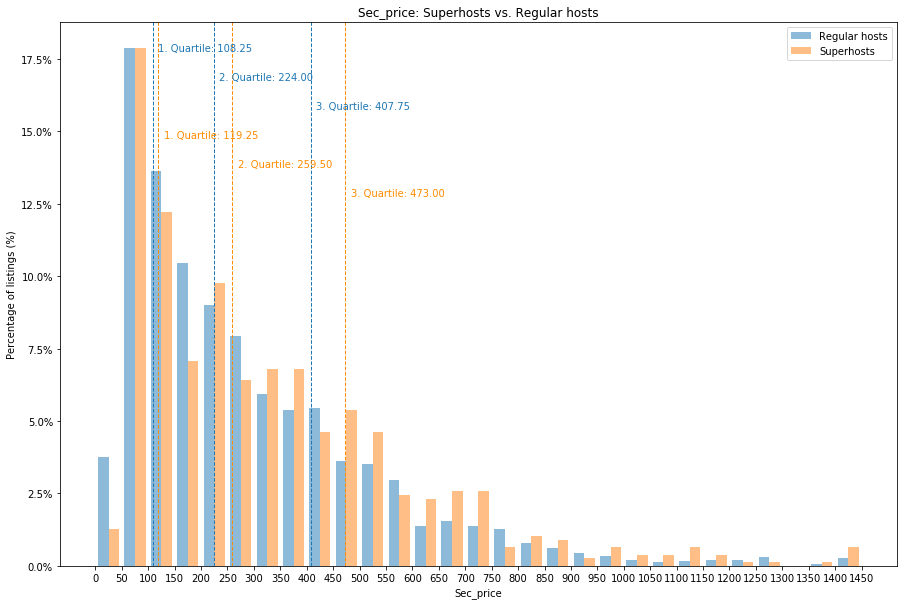

In [48]:
t.hist_generator(regular_hosts, super_hosts, 'sec_price', 50, max_range_99=True)

In [49]:
# Two-tailed Hypothesis Test: Total Price Results (price/night + cleaning fee)
print('\033[1m' 'Two-tailed Statistical Significance Test (alpha = 0.01):''\033[0m' '\n''\n'
      '\033[1m' 'Null Hypothesis:''\033[0m'
      ' No significant difference between regular hosts average price/night and superhosts average price/night'  '\n' '\n'
      '\033[1m' 'Alternative Hypothesis:''\033[0m'
      ' There is a significant difference between regular hosts average price/night and superhosts average price/night' '\n')

# Running the test with alpha = 0.01
t_value, t_crit = t.two_tail_t_test(regular_hosts, super_hosts, 'total_price', 0.01)

# Commenting Results
print('Our t statistic {:.2f} is between the the t critical values ±{:.2f}, thus it is outside of critical zone.'
      .format(t_value, t_crit))

print('\n''The result is NOT statistically significant for alpha = 0.01.' '\n''\n'
        '\033[1m''When it comes to price per night + cleaning fee, we do not observe'
        ' significant differences between regular and superhosts.')

Two-tailed Statistical Significance Test (alpha = 0.01):

Null Hypothesis: No significant difference between regular hosts average price/night and superhosts average price/night

Alternative Hypothesis: There is a significant difference between regular hosts average price/night and superhosts average price/night

Our t statistic 0.79 is between the the t critical values ±2.58, thus it is outside of critical zone.

The result is NOT statistically significant for alpha = 0.01.

When it comes to price per night + cleaning fee, we do not observe significant differences between regular and superhosts.


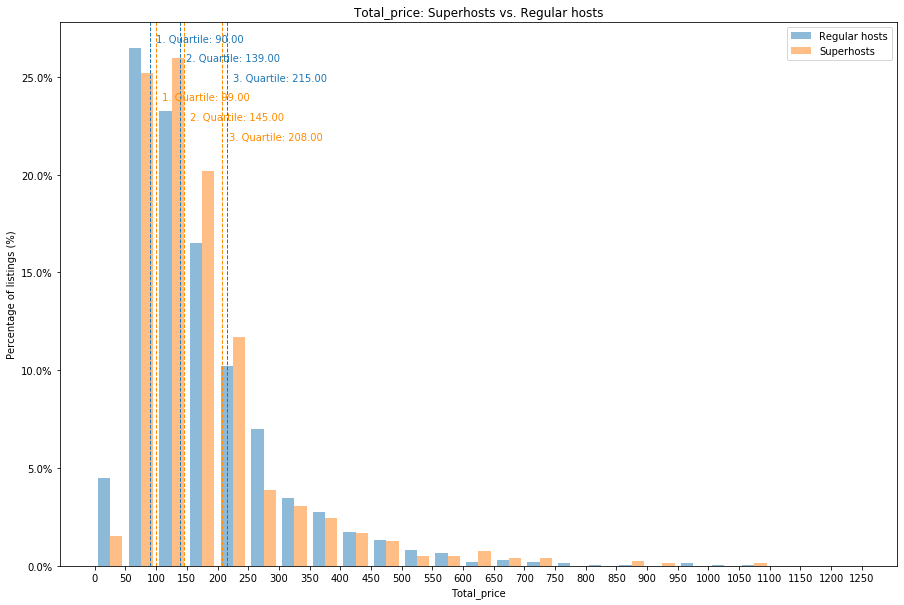

In [50]:
t.hist_generator(regular_hosts, super_hosts, 'total_price', 50)

In [51]:
# Two-tailed Hypothesis Test: Price/Night Results
print('\033[1m' 'Two-tailed Statistical Significance Test (alpha = 0.01):''\033[0m' '\n''\n'
      '\033[1m' 'Null Hypothesis:''\033[0m'
      ' No significant difference between regular hosts average price/night and superhosts average price/night'  '\n' '\n'
      '\033[1m' 'Alternative Hypothesis:''\033[0m'
      ' There is a significant difference between regular hosts average price/night and superhosts average price/night' '\n')

# Running the test with alpha = 0.01
t_value, t_crit = t.two_tail_t_test(regular_hosts, super_hosts, 'price', 0.01)

# Commenting Results
print('Our t statistic {:.2f} is between the the t critical values ±{:.2f}, thus it is outside of critical zone.'
      .format(t_value, t_crit))

print('\n''The result is NOT statistically significant for alpha = 0.01.' '\n''\n'
        '\033[1m''When it comes to price per night, we do not observe significant differences between regular and superhosts.')

Two-tailed Statistical Significance Test (alpha = 0.01):

Null Hypothesis: No significant difference between regular hosts average price/night and superhosts average price/night

Alternative Hypothesis: There is a significant difference between regular hosts average price/night and superhosts average price/night

Our t statistic 0.76 is between the the t critical values ±2.58, thus it is outside of critical zone.

The result is NOT statistically significant for alpha = 0.01.

When it comes to price per night, we do not observe significant differences between regular and superhosts.


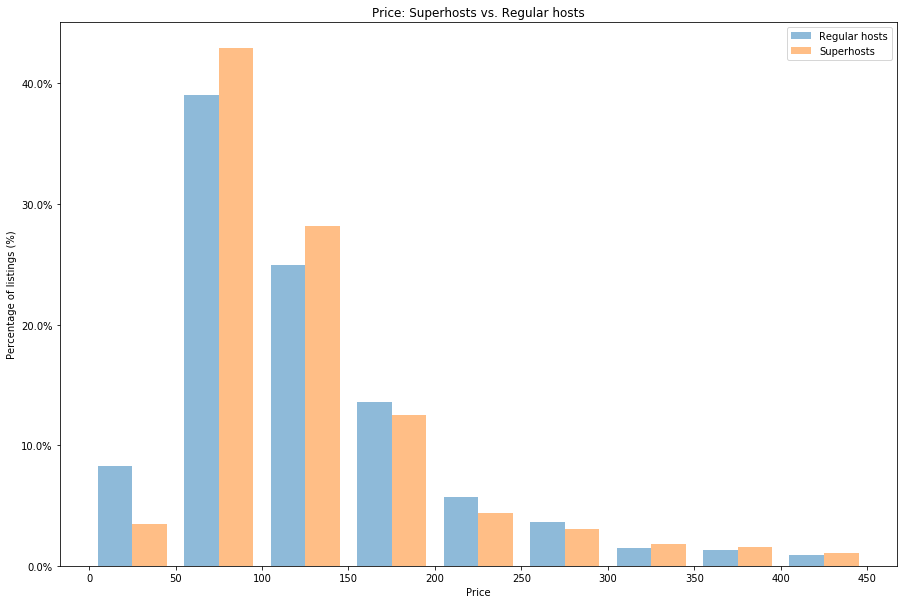

In [52]:
t.hist_generator(regular_hosts, super_hosts, 'price', 50, percentil = False, max_range_99 = True)

<a id="unnecessary"></a>
## After doing Statistial Tests we can say with confidence that Super Hosts don't tend to overcharge. 

<a id="unnecessary"></a>

# 3. Data Preparation

In [53]:
#Joining Datasets
df= pd.merge(calendar, listings, how='left', left_on='listing_id', right_on='id')
df.drop('listing_id', axis=1, inplace=True)

In [54]:
df.columns

Index(['date', 'available', 'price_x', 'month', 'year', 'day', 'id',
       'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
   

In [55]:
irrelevant_columns=['listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 
             'neighborhood_overview', 'notes', 'medium_url', 'picture_url', 
             'xl_picture_url', 'host_url', 'host_name', 'host_location', 
             'host_about', 'host_thumbnail_url', 'host_picture_url', 
             'host_neighbourhood', 'host_total_listings_count', 
             'host_verifications', 'street', 'neighbourhood', 'city', 'state', 
             'market', 'smart_location', 'country_code', 'country', 'price_y',
             'weekly_price', 'monthly_price', 'guests_included', 
             'calendar_updated', 'has_availability', 'calendar_last_scraped', 
             'first_review', 'last_review', 'requires_license', 'license', 
             'jurisdiction_names', 'reviews_per_month', 'square_feet']
df_no_irr = df.drop(irrelevant_columns, axis=1)

In [56]:
df_no_irr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 60 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   date                              1393570 non-null  datetime64[ns]
 1   available                         1393570 non-null  object        
 2   price_x                           934542 non-null   float64       
 3   month                             1393570 non-null  int64         
 4   year                              1393570 non-null  int64         
 5   day                               1393570 non-null  int64         
 6   id                                1393570 non-null  int64         
 7   name                              1393570 non-null  object        
 8   summary                           1328965 non-null  object        
 9   space                             1185885 non-null  object        
 10  description       

In [57]:
#We will be dropping rows with missing fields in the following columns
df_no_val_row = df_no_irr.dropna(subset=['bathrooms', 'bedrooms', 'beds', 'host_is_superhost'])

In [58]:
# Converting id and host_id to String Type
df_str = df_no_val_row.copy()
df_str.loc[:, ['id','host_id']] = df_str[['id','host_id']].astype(str)

In [59]:
boolean_cols=['available', 'host_is_superhost', 'host_has_profile_pic', 
'host_identity_verified', 'is_location_exact', 'instant_bookable', 
             'require_guest_profile_picture', 'require_guest_phone_verification']
df_bool = df_str.copy()
df_bool.loc[:, boolean_cols] = df_bool[boolean_cols].replace({'t': 1, 'f': 0})

In [60]:
df_bool['hosts_response_rate']=df_bool['host_response_rate'].str.strip("%").str.replace(",","").astype(float)
df_bool['extra_people']=df_bool['extra_people'].str.strip("$").str.replace(",","").astype(float)

In [61]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384810 entries, 0 to 1393569
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   date                              1384810 non-null  datetime64[ns]
 1   available                         1384810 non-null  int64         
 2   price_x                           927644 non-null   float64       
 3   month                             1384810 non-null  int64         
 4   year                              1384810 non-null  int64         
 5   day                               1384810 non-null  int64         
 6   id                                1384810 non-null  object        
 7   name                              1384810 non-null  object        
 8   summary                           1323855 non-null  object        
 9   space                             1177490 non-null  object        
 10  description       

In [62]:
#Converting Columns to DateTime
df_date_time=df_bool.copy()
df_date_time['host_since']=pd.to_datetime(df_date_time['host_since'])

In [63]:
df_date_time['host_since'].head(10)

0   2011-08-11
1   2011-08-11
2   2011-08-11
3   2011-08-11
4   2011-08-11
5   2011-08-11
6   2011-08-11
7   2011-08-11
8   2011-08-11
9   2011-08-11
Name: host_since, dtype: datetime64[ns]

In [64]:
df_date_time.host_since = df_date_time.host_since.astype(np.int64)

In [65]:
df_clean_amen = df_date_time.copy()

In [66]:
#Listing out Amenities
df_clean_amen.amenities = df_clean_amen.amenities.str.strip('{}').str.replace('"', '')

# Extract unique values
df_amenities = df_clean_amen.amenities.str.split(',', expand=True)
amenities = pd.unique(df_amenities.values.ravel('K'))

In [67]:
# Creating new columns for amenities
for amenity in amenities:
    try:
         df_clean_amen[amenity] = df_clean_amen.amenities.str.contains(amenity)
    except:
        continue

/Users/siddharthamahendra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [68]:
df_clean_amen.drop('amenities', axis=1, inplace=True)

In [69]:
df_clean_amen.columns

Index(['date', 'available', 'price_x', 'month', 'year', 'day', 'id', 'name',
       'summary', 'space',
       ...
       'Safety Card', 'Washer / Dryer', 'Suitable for Events', 'Other pet(s)',
       'Hangers', '24-Hour Check-in', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Hair Dryer', 'Iron'],
      dtype='object', length=102)

In [70]:
#These columns don't tend to carry so much value so we will drop them
drop_cols = ['host_listings_count', 'minimum_nights', 'maximum_nights', 
             'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'calculated_host_listings_count', 
             'summary', 'space', 'description', 'transit', 
             'host_acceptance_rate', 'host_response_rate', 'is_location_exact', 
             'host_id', 'zipcode']

df_final = df_clean_amen.drop(drop_cols, axis=1)

In [71]:
df_final.to_csv('data_final.csv',index=False)

<a> </a>
### Feature Engineering

In [72]:
dtype={"available": int, "id": str, "date": str, "price": float, "name": str, 
       "host_since": int, "host_response_time": str, "host_is_superhost": int, 
       "thumbnail_url": str,        "host_has_profile_pic": int, 
       "host_identity_verified": int, "neighbourhood_cleansed": str, 
       "neighbourhood_group_cleansed": str, "latitude": float, "longitude": float, 
       "property_type": str, "room_type": str, "accommodates": int, 
       "bathrooms": float, "bedrooms": float, "beds": float, "bed_type": str,
       "security_deposit": float, "cleaning_fee": float, "extra_people": float,
       "number_of_reviews": int, "review_scores_rating": float, 
       "review_scores_accuracy": float, "review_scoares_cleanliness": float,
       "review_scores_checkin": float, "review_scores_communication": float,
       "review_scores_location": float, "review_scores_value": float, 
       "instant_bookable": int, "cancellation_policy": str, 
       "require_guest_profile_picture": int, 
       "require_guest_phone_verification": int}

In [73]:
df_clean = pd.read_csv('data_final.csv', dtype=dtype, 
                       date_parser=pd.to_datetime, parse_dates=['date'])

### Checking for Skew

Text(0, 0.5, 'Count')

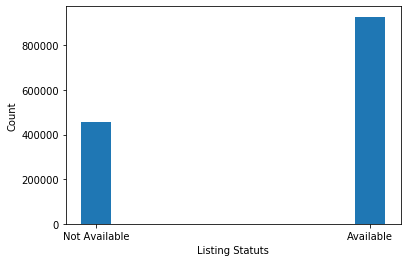

In [74]:
# Split into signals and response
y = df_clean['available']
X = df_clean.drop('available', axis=1)

# Explore balance of response
y.hist(grid=False)
plt.xticks([0.05, 0.95], ['Not Available', 'Available'])
plt.xlabel('Listing Statuts')
plt.ylabel('Count')

### Balancing Skew in responsed using Random Sampling

In [75]:
not_available = df_clean[df_clean['available'] == 0]
n_not_available = not_available.shape[0]

# Sample this from "available" records
available = df_clean[df_clean['available'] == 1].sample(n_not_available, random_state=42)

# Join together and create new X and y
df_balanced = pd.concat([not_available, available])
df_balanced.to_csv('data_balanced.csv')
X_balanced = df_balanced.drop('available', axis=1)
y_balanced = df_balanced['available']


([<matplotlib.axis.XTick at 0x7f8805377150>,
 <a list of 2 Text xticklabel objects>)

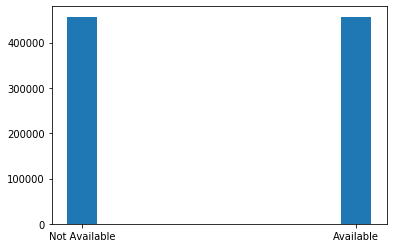

In [76]:
y_balanced.hist(grid=False)
plt.xticks([0.05, 0.95], ['Not Available', 'Available'])

In [77]:
#Categorical Columns to Dummies

df_catcols = pd.get_dummies(X_balanced[['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']], dummy_na=True)
X_cat_dummies = pd.merge(X_balanced, df_catcols, left_index=True, right_index=True)
X_cat_dummies.drop(['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'], axis=1, inplace=True)

In [78]:
X_date_dummies = X_cat_dummies.copy()
X_date_dummies['weekday'] = X_date_dummies.date.dt.dayofweek

In [79]:
#Incorporating Seasons in the Dataframe
summer_season = ('2016-06-20', '2016-09-22')
fall_season = ('2016-09-22', '2016-12-21')
winter_end_of_year = ('2016-12-21', '2017-03-20')
winter_start_of_year = ('2016-01-01', '2016-03-19')
spring_season = ('2016-03-19', '2016-06-20')

seasons = [summer_season, fall_season, spring_season]
names = ['summer', 'fall', 'spring']

for season, name in zip(seasons, names):
    X_date_dummies[name] = (season[0] <= X_date_dummies.date) & (X_date_dummies.date < season[1])

X_date_dummies['winter'] = ((winter_end_of_year[0] <= X_date_dummies.date) & (X_date_dummies.date < winter_end_of_year[1])) \
                           | ((winter_start_of_year[0] <= X_date_dummies.date) & (X_date_dummies.date < winter_start_of_year[1]))

In [80]:
#Incorporating Holidays in the Data Frame
new_year = ['new_year', 'Friday', '2016-01-01']
mlk = ['mlk', 'Monday', '2016-01-16']
presidents = ['presidents', 'Monday', '2016-02-15']
memorial = ['memorial', 'Monday', '2016-05-30']
fourth_july = ['fourth_july', 'Monday', '2016-07-04']
labor = ['labor', 'Monday', '2016-09-05']
veteran = ['veteran', 'Friday', '2016-11-11']
thanksgiving = ['thanksgiving', 'Thursday', '2016-11-24']
christmas = ['christmas', 'Monday', '2016-12-26']

holidays = [new_year, mlk, presidents, memorial, fourth_july, labor, 
            veteran, thanksgiving, christmas]

# Define start and end for each holiday
for holiday in holidays:
    hol_date = datetime.strptime(holiday[2], '%Y-%m-%d')
    if holiday[1] == 'Monday':
        # Start date is the Friday before
        holiday.append(hol_date - timedelta(days=3))
        # End date is the day after
        holiday.append(hol_date + timedelta(days=1))
    if holiday[1] == 'Friday':
        # Start date is the day before
        holiday.append(hol_date - timedelta(days=1))
        # End date is the Monday after
        holiday.append(hol_date + timedelta(days=3))
    if holiday[1] == 'Thursday':
        # Start date is the day before
        holiday.append(hol_date - timedelta(days=1))
        # End date is the Monday after
        holiday.append(hol_date + timedelta(days=4))

# Create columns
for holiday in holidays:
    X_date_dummies[holiday[0]] = (holiday[-2] \
                                  <= X_date_dummies.date) \
                                 & (X_date_dummies.date < holiday[-1])

In [81]:
winter_break = ['winter_break', '2016-12-19', '2017-01-02']
mid_winter_break = ['mid_winter_break', '2016-02-15', '2016-02-22']
spring_break = ['spring_break', '2016-04-11', '2016-04-18']
summer_break = ['summer_break', '2016-06-22', '2016-09-07']

school_hols = [winter_break, mid_winter_break, spring_break, summer_break]

# Create columns
for holiday in school_hols:
    X_date_dummies[holiday[0]] = (holiday[1] <= X_date_dummies.date) & (X_date_dummies.date < holiday[2])

In [82]:
X_date_dummies.drop('date', axis=1, inplace=True)

## Train Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_date_dummies, y_balanced, test_size=0.9, random_state=42)

# Save datasets
files = [X_train, y_train, X_test, y_test]
names = ['X_train', 'y_train', 'X_test', 'y_test']
folder = ''

for file, name in zip(files, names):
    file.to_csv(os.path.join(folder, name + '.csv'), index=False)
    print(name + ":", file.shape)

X_train: (91433, 236)
y_train: (91433,)
X_test: (822899, 236)
y_test: (822899,)


In [84]:
dtype={"price": float, "name": str, 
       "host_since": int, "host_response_time": str, "host_is_superhost": int, 
       "host_has_profile_pic": int, "host_identity_verified": int, 
       "neighbourhood_cleansed": str, "neighbourhood_group_cleansed": str,
       "latitude": float, "longitude": float, 
       "property_type": str, "room_type": str, "accommodates": int, 
       "bathrooms": float, "bedrooms": float, "beds": float, "bed_type": str,
       "security_deposit": float, "cleaning_fee": float, "extra_people": float,
       "number_of_reviews": int, "review_scores_rating": float, 
       "review_scores_accuracy": float, "review_scoares_cleanliness": float,
       "review_scores_checkin": float, "review_scores_communication": float,
       "review_scores_location": float, "review_scores_value": float, 
       "instant_bookable": int, "cancellation_policy": str, 
       "require_guest_profile_picture": int, 
       "require_guest_phone_verification": int}

X_train = pd.read_csv('X_train.csv', dtype=dtype)

In [85]:
X_train.columns.get_loc('host_response_time_a few days or more')

76

In [86]:
skew_scores = X_train.skew()
skew_scores[np.abs(skew_scores) > 2]

price_x                  3.249416
year                    14.023083
host_has_profile_pic   -22.858173
bathrooms                3.047324
beds                     2.411026
                          ...    
thanksgiving             8.661983
christmas                9.528441
winter_break             4.982057
mid_winter_break         7.036222
spring_break             6.931410
Length: 172, dtype: float64

In [87]:
skewed = ['price', 'bathrooms', 'beds', 'security_deposit', 'extra_people', 
          'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
          'review_scores_cleanliness', 'review_scores_checkin', 
          'review_scores_communication', 'review_scores_value']

## Exploring Missing Values

In [88]:
explore_cols = ['security_deposit', 'cleaning_fee', 'review_scores_rating', 
                'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_location', 
                'review_scores_value']

In [89]:
X_train[explore_cols].describe()

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value
count,44868.000000,66638.000000,75317.000000,75012.000000,75158.000000,75031.000000,75103.000000,75072.000000
mean,289.941183,60.788754,94.604777,9.643470,9.562216,9.788634,9.614955,9.469629
std,283.430294,47.902249,6.726488,0.696387,0.798253,0.607990,0.629379,0.757821
min,95.000000,5.000000,20.000000,2.000000,3.000000,2.000000,4.000000,2.000000
25%,150.000000,25.000000,93.000000,9.000000,9.000000,10.000000,9.000000,9.000000
50%,250.000000,50.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,300.000000,80.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,5000.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [90]:
X_train[explore_cols[2:]].isna().sum()

review_scores_rating         16116
review_scores_accuracy       16421
review_scores_cleanliness    16275
review_scores_checkin        16402
review_scores_location       16330
review_scores_value          16361
dtype: int64

# 4. Modelling

In [91]:
def create_missing_dummies(df, copy=True):
    '''
    Create dummy columns for missing values of reviews and thumbnail_url
    and drops the thumbnail_url column.
    
    Inputs:
        df: (pandas dataframe) Contains the columns ['review_scores_rating', 
            'review_scores_accuracy', 'review_scores_cleanliness', 
            'review_scores_checkin', 'review_scores_location', 
            'review_scores_value', 'review_scores_communication', 'thumbnail_url']
        copy: (bool) Indicates whether a copy of the original df should be created.
    
    Outputs:
        df (pandas dataframe)
    '''
    if copy:
        df = df.copy()
    
    # Create dummy columns for missing ratings
    missing_cols = ['review_scores_rating', 'review_scores_accuracy', 
                    'review_scores_cleanliness', 'review_scores_checkin', 
                    'review_scores_location', 'review_scores_value', 
                    'review_scores_communication']

    for col in missing_cols:
        try:
            df[col + '_missing'] = df[col].isna()
        except KeyError:
            continue
    
    # Create dummy column for missing picture
    for col in ['thumbnail_url']:
        try:
            df['listing_has_picture'] = ~(df[col].isna())
            df.drop('thumbnail_url', axis=1, inplace=True)
        except KeyError:
            continue
    
    return df

In [92]:
X_train_missing = create_missing_dummies(X_train)

# Test: Confirm that missing thumbnail_url is the same as 
# False listing_has_picture count
assert X_train.thumbnail_url.isna().sum() \
       == X_train_missing[X_train_missing.listing_has_picture == False].shape[0]

# Test: Confirm correct columns - seven additional columns
assert X_train_missing.shape[1] \
       == (X_train.shape[1] + 7)

## Skew Correction

In [93]:
class SkewCorrection(BaseEstimator, TransformerMixin):
    '''
    Imputation transformer to log-transform specified columns.
    Returns a dataframe.
    
    Parameters:
        skewed_cols: (array-like) The columns names to be transformed.
    '''
    def __init__(self, 
                 skewed_cols=['price', 'bathrooms', 'beds', 'security_deposit', 
                              'extra_people', 'number_of_reviews', 
                              'review_scores_rating', 'review_scores_accuracy', 
                              'review_scores_cleanliness', 'review_scores_checkin', 
                              'review_scores_communication', 'review_scores_value']):
        self._skewed_cols = skewed_cols
    
    def fit(self, x, y=None):
        '''
        Fit the imputer on x.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            self
        '''
        return self
    
    def transform(self, x):
        '''
        Log-transforms specified columns in x.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            x: (Pandas DataFrame)
        '''
        for col in self._skewed_cols:
            try:
                x[col] = x[col].apply(lambda x: np.log(x + 0.01))
            except KeyError:
                continue
        return x

In [94]:
class SkewCorrection(BaseEstimator, TransformerMixin):
    '''
    Imputation transformer to identify columns non-binary columns with an absolute 
    skew greater than 2 and log-transform them. Returns a dataframe.
    
    Parameters:
        copy: (bool, optional, default=True) If True, a copy of x will be created. 
              If False, imputation will be done in-place.
    Attributes:
        _skewed_cols: (list) The names of the skewed columns.
    '''
    def __init__(self, copy=True):
        self._skewed_cols = None
        self.copy = copy
    
    def determine_skewed(self, x):
        '''
        Identifies columns with more than 2 values that are also skewed.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            skewed_cols: (list) The names of the skewed columns.
        '''
        # Select non-binary columns
        non_binary_cols = [col for col in x.columns if x[col].nunique() > 2]
        # Select for skew absolute greater than 2
        is_skewed = np.abs(x[non_binary_cols].skew()) > 2
        skewed_cols = is_skewed[is_skewed].index.tolist()
        return skewed_cols
          
    def fit(self, x, y=None):
        '''
        Fit the imputer on x.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            self
        '''
        self._skewed_cols = self.determine_skewed(x)
        return self
    
    def transform(self, x):
        '''
        Log-transforms all skewed, non-binary columns in x.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            x: (Pandas DataFrame)
        '''
        if self.copy:
            x = x.copy()
        for col in self._skewed_cols:
            x[col] = x[col].apply(lambda x: np.log(x + 0.001)) 
        return x

In [95]:
test_alt = X_train_missing.sample(100).copy()

skewcorrect = SkewCorrection()
skewcorrect.fit(test_alt)
print(skewcorrect._skewed_cols)

['price_x', 'bathrooms', 'security_deposit', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'total_price', 'sec_price', 'hosts_response_rate']


In [96]:
result = skewcorrect.transform(test_alt)
result.describe()

,price_x,month,year,day,id,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,weekday
count,45.000000,100.000000,100.0,100.000000,1.000000e+02,1.000000e+02,100.00000,100.0,100.00000,100.000000,...,100.00,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.000000
mean,4.666037,6.770000,2016.0,15.560000,5.934393e+06,1.384279e+18,0.21000,1.0,0.79000,47.622716,...,0.01,0.030000,0.0,0.960000,0.0,0.290000,0.350000,0.360000,0.0,2.830000
std,0.735178,3.419655,0.0,8.782811,2.877545e+06,5.199590e+16,0.40936,0.0,0.40936,0.040427,...,0.10,0.171447,0.0,0.196946,0.0,0.456048,0.479372,0.482418,0.0,1.891261
min,2.995782,1.000000,2016.0,1.000000,1.961900e+04,1.249776e+18,0.00000,1.0,0.00000,47.514680,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.234121,4.000000,2016.0,8.750000,3.858734e+06,1.359158e+18,0.00000,1.0,1.00000,47.606459,...,0.00,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
50%,4.574721,7.000000,2016.0,15.000000,6.221060e+06,1.392422e+18,0.00000,1.0,1.00000,47.622202,...,0.00,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000
75%,5.075180,10.000000,2016.0,24.000000,8.333853e+06,1.424779e+18,0.00000,1.0,1.00000,47.647425,...,0.00,0.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,4.000000
max,6.652864,12.000000,2016.0,30.000000,1.033418e+07,1.451693e+18,1.00000,1.0,1.00000,47.707072,...,1.00,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,6.000000


In [97]:
class FillByID(TransformerMixin, BaseEstimator):
    '''
    Imputation transformer to identify columns non-binary columns with an absolute 
    skew greater than 2 and log-transform them. Returns a dataframe.
    
    Parameters:
        id_column: (str) Name of column used to group in x.
        fill_column: (str) Name of column in x with missing values to be filled.
        drop_id: (bool, optional, default=True) If True, the id_column will be 
                 dropped. If False, the id_column will be retained.
        copy: (bool, optional, default=True) If True, a copy of x will be created. 
              If False, imputation will be done in-place.
    Attributes:
        _id_means: (Pandas Series) The means of grouped column. The index contains
                   the ids.
        _mean: (float) The mean of the fill_column prior to filling.
    '''
    def __init__(self, id_column, fill_column, drop_id=True, copy=True):
        self.id_column = id_column
        self.fill_column = fill_column
        self.drop_id = drop_id
        self.copy = copy
        self._id_means = None
        self._mean = None
    
    def _get_id_means(self, x):
        '''
        Computes the mean of the fill_column in x, grouped by id_column.
        
        Parameters:
            x: (Pandas DataFrame) At least contains column names of the id_column
               and the fill_column.
        Returns:
            id_means: (array-like) The means of grouped column. The index contains
                      the ids.
        '''
        id_means = x.groupby(self.id_column)[self.fill_column].mean()
        # Filter out missing values
        id_means = id_means[~id_means.isna()]
        return id_means
    
    def fit(self, x, y=None):
        '''
        Fit the imputer on x. Stores the values for _id_means and _mean attributes.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            self
        '''
        self._id_means = self._get_id_means(x)
        self._mean = x[self.fill_column].mean()
        return self
    
    def transform(self, x):
        '''
        Fill missing values in the fill_column in x. If the value in the id_column
        is in the _id_means index, it is filled with the correspoding
        value. If it is not in the _id_means index, it is filled with the _mean value.
        
        Parameters:
            x: (Pandas DataFrame)
        Returns:
            x: (Pandas DataFrame)
        '''
        if self.copy:
            x = x.copy()
        # Fill shared ids with corresponding mean
        for idx in self._id_means.index:
            x.loc[x[self.id_column] == idx, self.fill_column] = \
            x[x[self.id_column] == idx][self.fill_column].fillna(self._id_means[idx])
        # Fill all other nan with overall mean
        x[self.fill_column].fillna(self._mean, inplace=True)
        
        if self.drop_id:
            x.drop(self.id_column, axis=1, inplace=True)
        
        return x

In [98]:
class DropColumn(TransformerMixin, BaseEstimator):
    '''
    Imputation transformer to drop columns in X. Returns a dataframe.
    
    Parameters:
        columns: (array-like) Name of columns in X to be dropped.
        copy: (bool, optional, default=True) If True, a copy of X will be created. 
              If False, imputation will be done in-place.
    Attributes:
        _col_means: (array-like) The means of columns. The index contains
                    the column names.
    '''
    def __init__(self, columns, copy=True):
        self.columns = columns
        self.copy = copy
    
    def fit(self, X, y=None):
        '''
        Fit the imputer on X.
        
        Parameters:
            X: (Pandas DataFrame)
        Returns:
            self
        '''
        return self
    
    def transform(self, X):
        '''
        Drop specified columns from X.
        
        Parameters:
            X: (Pandas DataFrame)
        Returns:
            X: (Pandas DataFrame)
        '''
        if self.copy:
            X = X.copy()
        
        X.drop(self.columns, axis=1, inplace=True)
        
        return X

In [99]:
drop_test = pd.DataFrame({'price':[1, 2, 3, 4, np.nan, 5, np.nan], 
                          'id': [1, 1, 1, 1, 1, 2, np.nan], 
                          'bedrooms': [3, 4, 8, 7, 1, 1, 3]})

In [100]:
class WordCount(TransformerMixin, BaseEstimator):
    '''
    Imputation transformer to identify the most common words in a column of text
    and vectorize the count of these words using scikit-learn's CountVectorizer.
    
    Parameters:
        column: (st) Name of text column in X.
        max_features: (int) The number of most common words to count.
        copy: (bool, optional, default=True) If True, a copy of X will be created. 
              If False, imputation will be done in-place.
    Attributes:
        _vocab: (dict) A mapping of terms to feature indices. 
    '''
    def __init__(self, column, max_features=30, copy=True):
        self.column = column
        self.max_features = max_features
        self.copy = True
        self._vocab = None
        
    def fit(self, X, y=None):
        '''
        Fit the imputer on X.
        
        Parameters:
            X: (Pandas DataFrame)
        Returns:
            self
        '''
        return self
    
    def transform(self, X):
        '''
        Create count vectorized columns for most common words in the text
        column in X. If previously fitted, use the vocabulary found in _vocab.
        
        Parameters:
            X: (Pandas DataFrame)
        Returns:
            X: (Pandas DataFrame)
        '''
        if self.copy:
            X = X.copy()
        if self._vocab != None:
            vectorizer = CountVectorizer(stop_words='english', 
                                         vocabulary=self._vocab)
        else:
            vectorizer = CountVectorizer(stop_words='english', 
                                         max_features=self.max_features)
            
        word_count = vectorizer.fit_transform(X[self.column]).toarray()
        self._vocab = vectorizer.vocabulary_
        col_names = [self.column + '_' + word for word in vectorizer.get_feature_names()]
        word_count_df = pd.DataFrame(word_count, columns=col_names, index=X.index)
        
        X = pd.concat([X, word_count_df], axis=1)
        X.drop(self.column, axis=1, inplace=True)
        
        return X

In [101]:
keep_cols = ['id', 'price_x', 'accommodates', 'bathrooms', 'bedrooms', 'weekday', 
             'summer', 'fall', 'spring', 'winter', 'new_year', 'mlk', 
             'presidents', 'memorial', 'fourth_july', 'labor', 'veteran', 
             'thanksgiving', 'christmas', 'winter_break', 'mid_winter_break', 
             'spring_break', 'summer_break']

In [102]:
def read_X_data(file, dtypes, keep_cols=None, sample=None, copy=True):
    '''
    Read in previously saved csv file of feature data (in machine learning) 
    and create dummy columns for missing values. Allow for selecting a
    subset of the data, a sample of the data and returning a copy of X.
        
    Parameters:
        file: (str) Location/name of file.
        dtypes: (dict) Mapping of datatypes for columns in X.
        keep_cols: (array-like, optional, default=None) Names of columns
                   to retain in X.
        sample: (int, optional, default=None) Number of rows to randomly
                sample from X.
        
    Returns:
        X: (Pandas DataFrame)
    '''
    # Read in file using specified datatypes
    data = pd.read_csv(file, dtype=dtypes)
    # Subset by keep_cols
    if keep_cols:
        data = data[keep_cols]
    # Create missing value columns
    data = create_missing_dummies(data)
    # Select sample
    if sample:
        data = data.sample(sample, random_state=42)
    
    return data

In [103]:
def read_y_data(file, index=np.array([])):
    '''
    Read in previously saved csv file of target data (in machine learning).
    Allow for subsetting the data by index.
        
    Parameters:
        file: (str) Location/name of file.
        index: (Numpy array, optional, default=Empty array) Array of
               indices for subsetting.
        
    Returns:
        data: (array)
    '''
    data = pd.read_csv(file, header=None)
    if index.shape[0] >= 1:
        data = data.iloc[index, 0].values
    else:
        data = data[0].values
    
    return data

In [109]:
dtypes={"price_x": float, "name": str, 
       "host_since": int, "host_response_time": str, "host_is_superhost": int, 
       "host_has_profile_pic": int, "host_identity_verified": int, 
       "neighbourhood_cleansed": str, "neighbourhood_group_cleansed": str,
       "latitude": float, "longitude": float, 
       "property_type": str, "room_type": str, "accommodates": int, 
       "bathrooms": float, "bedrooms": float, "beds": float, "bed_type": str,
       "security_deposit": float, "cleaning_fee": float, "extra_people": float,
       "number_of_reviews": int, "review_scores_rating": float, 
       "review_scores_accuracy": float, "review_scoares_cleanliness": float,
       "review_scores_checkin": float, "review_scores_communication": float,
       "review_scores_location": float, "review_scores_value": float, 
       "instant_bookable": int, "cancellation_policy": str, 
       "require_guest_profile_picture": int, 
       "require_guest_phone_verification": int}

X_train_initial = read_X_data('X_train.csv', dtypes=dtypes, keep_cols=keep_cols)
X_test_initial = read_X_data('X_test.csv', dtypes=dtypes, keep_cols=keep_cols, sample=100000)
y_train = read_y_data('y_train.csv')
y_test = read_y_data('y_test.csv', index=X_test_initial.index)

In [110]:
rf_pipeline = Pipeline([
    ('skew', SkewCorrection()),
    ('price_x', FillByID(id_column='id', fill_column='price_x', drop_id=True)),
    ('clf', RandomForestClassifier())
])



In [111]:
y_train.shape

(91433,)

# 5. Evaluation

In [112]:
rf_pipeline.fit(X_train_initial, y_train)


Pipeline(memory=None,
         steps=[('skew', SkewCorrection(copy=True)),
                ('price_x',
                 FillByID(copy=True, drop_id=True, fill_column='price_x',
                          id_column='id')),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                     

In [113]:
rf_preds = rf_pipeline.predict(X_train_initial)


In [119]:
rf_accuracy = accuracy_score(y_train, rf_preds)

rf_accuracy

0.8959894130128072

## We got an accuracy of 89.59%

In [120]:
rf_test_preds = rf_pipeline.predict(X_test_initial)


In [124]:
rf_test_accuracy=accuracy_score(y_test, rf_test_preds)
rf_test_accuracy

0.73283

## We got an accuracy of 73.28% on the Test Dataset

In [125]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    Plot the confusion matrix.
    
    Parameters:
        cm: (array-like) Array of values from scikit-learn's
            confusion_matrix function.
        classes: (array-like) Names of classes ordered by corresponding
                 target value.
        title: (str, optional, default="Confusion matrix")
               Title for the plot.
        cmap: (matplotlib.pyplot color map, optional, default=plt.cm.Blues)
              Color palette for the plot.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

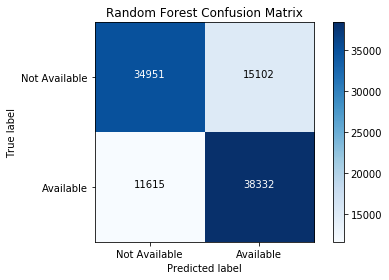

In [126]:
rf_cm = confusion_matrix(y_test, rf_test_preds)
plot_confusion_matrix(rf_cm, ['Not Available', 'Available'], "Random Forest Confusion Matrix")

In [127]:
def plot_feature_importance(clf, keep_cols, fig_size=(5, 6)):
    '''
    Plot feature importance for a classifier.
    
    Parameters:
        classifier: Pipline object with classifier object.
        keep_cols: (array-like) Feature names.
        fig_size: (array-like, optional, default=(5,6)) Dimensions for the plot.
    '''
    classifier = clf.named_steps['clf']
    importances = classifier.feature_importances_
    indices = np.argsort(importances)
    features = np.array([col for col in keep_cols if col != 'id'])
    features = features[indices]
    
    # Plot the feature importances of the forest
    plt.figure(figsize=fig_size)
    plt.title("Feature Importances for {}".format(classifier.__class__.__name__))
    plt.barh(range(features.shape[0]), importances[indices], align="center")
    plt.yticks(range(features.shape[0]), features)
    plt.ylim([-1, features.shape[0]]);
    
    # Print the feature ranking
    print("Feature Ranking %s:" % (classifier.__class__.__name__))

    for f in range(features.shape[0]):
        print("%d. %s: %f" % (f + 1, features[::-1][f], importances[indices[::-1][f]]))

Feature Ranking RandomForestClassifier:
1. price_x: 0.737912
2. accommodates: 0.075358
3. weekday: 0.066540
4. bathrooms: 0.053658
5. bedrooms: 0.033890
6. fall: 0.003913
7. winter: 0.003894
8. winter_break: 0.003396
9. summer_break: 0.002718
10. spring: 0.002392
11. spring_break: 0.002182
12. summer: 0.002016
13. mlk: 0.002004
14. mid_winter_break: 0.001923
15. presidents: 0.001467
16. memorial: 0.001457
17. labor: 0.001198
18. fourth_july: 0.001152
19. thanksgiving: 0.001092
20. veteran: 0.000957
21. christmas: 0.000879
22. new_year: 0.000000


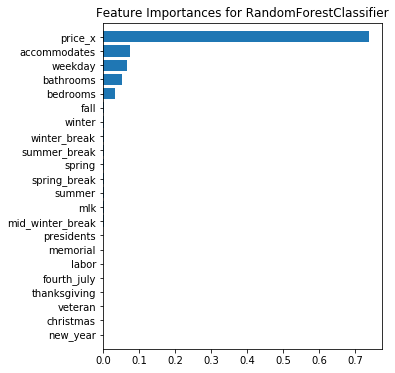

In [128]:
plot_feature_importance(rf_pipeline, keep_cols)

### Price and Number of Reviews are the most important Features for the RFC

### Based on the above analysis we can remove certain data which seems to have little or no impact on our model.

In [139]:
keep_cols = ['id', 'price_x', 'bedrooms', 'weekday', 'host_is_superhost', 
             'number_of_reviews', 'property_type_Apartment',
             'property_type_Bed & Breakfast', 'property_type_Boat',
             'property_type_Bungalow', 'property_type_Cabin',
             'property_type_Camper/RV', 'property_type_Chalet',
             'property_type_Condominium', 'property_type_Dorm',
             'property_type_House', 'property_type_Loft', 'property_type_Other',
             'property_type_Tent', 'property_type_Townhouse',
             'property_type_Treehouse', 'property_type_Yurt', 'property_type_nan',
             'room_type_Entire home/apt', 'room_type_Private room',
             'room_type_Shared room', 'room_type_nan']

dtypes={"price_x": float, "name": str, 
       "host_since": int, "host_response_time": str, "host_is_superhost": int, 
       "host_has_profile_pic": int, "host_identity_verified": int, 
       "neighbourhood_cleansed": str, "neighbourhood_group_cleansed": str,
       "latitude": float, "longitude": float, 
       "property_type": str, "room_type": str, "accommodates": int, 
       "bathrooms": float, "bedrooms": float, "beds": float, "bed_type": str,
       "security_deposit": float, "cleaning_fee": float, "extra_people": float,
       "number_of_reviews": int, "review_scores_rating": float, 
       "review_scores_accuracy": float, "review_scoares_cleanliness": float,
       "review_scores_checkin": float, "review_scores_communication": float,
       "review_scores_location": float, "review_scores_value": float, 
       "instant_bookable": int, "cancellation_policy": str, 
       "require_guest_profile_picture": int, 
       "require_guest_phone_verification": int}

X_train_develop = read_X_data('X_train.csv', dtypes=dtypes, keep_cols=keep_cols)
X_test_develop = read_X_data('X_test.csv', dtypes=dtypes, keep_cols=keep_cols, sample=100000)
y_train = read_y_data('y_train.csv')
y_test = read_y_data('y_test.csv', index=X_test_develop.index)

In [140]:
def pipeline_results(pipeline, X_train, X_test, y_train, y_test, model_name):
    '''
    Fit pipeline and print accuracy results.
    
    Parameters:
        pipeline: Pipline object with classifier object.
        X_train: (Pandas DataFrame) Feature train data.
        X_test: (Pandas DataFrame) Feature test data.
        y_train: (Numpy array) Target train data.
        y_test: (Numpy array) Target test data.
        model_name: (str) Name of the model.
    
    Returns:
        pipeline: Fitted pipeline object.
        preds_train: (Numpy array) Target predictions for train data.
        preds_test: (Numpy array) Target predictions for test data.
    '''
    pipeline.fit(X_train, y_train)
    
    # Get training accuracy
    preds_train = pipeline.predict(X_train)
    acc_train = accuracy_score(y_train, preds_train)
    
    # Get test accuracy
    preds_test = pipeline.predict(X_test)
    acc_test = accuracy_score(y_test, preds_test)
    print("{} train acc: {}, test acc: {}".format(model_name, acc_train, acc_test))
    
    return pipeline, preds_train, preds_test

In [141]:
rf_pipeline_wordcount = Pipeline([
    ('skew', SkewCorrection()),
    ('price_x', FillByID(id_column='id', fill_column='price_x', drop_id=True)),
    ('wordcount', WordCount(column='name')),
    ('clf', RandomForestClassifier(random_state=42))
])

In [142]:
keep_cols = ['id', 'price_x', 'bedrooms', 'weekday', 'host_is_superhost', 
             'number_of_reviews', 'property_type_Apartment',
             'property_type_Bed & Breakfast', 'property_type_Bungalow', 
             'property_type_Cabin', 'property_type_Camper/RV', 
             'property_type_Condominium', 'property_type_House', 
             'property_type_Loft', 'property_type_Other', 
             'property_type_Townhouse', 'room_type_Entire home/apt', 
             'room_type_Private room', 'room_type_Shared room', 'name', 
             'cancellation_policy_flexible', 'cancellation_policy_moderate', 
             'cancellation_policy_strict', 'cancellation_policy_nan']

dtypes={"price_x": float, "name": str, 
       "host_since": int, "host_response_time": str, "host_is_superhost": int, 
       "host_has_profile_pic": int, "host_identity_verified": int, 
       "neighbourhood_cleansed": str, "neighbourhood_group_cleansed": str,
       "latitude": float, "longitude": float, 
       "property_type": str, "room_type": str, "accommodates": int, 
       "bathrooms": float, "bedrooms": float, "beds": float, "bed_type": str,
       "security_deposit": float, "cleaning_fee": float, "extra_people": float,
       "number_of_reviews": int, "review_scores_rating": float, 
       "review_scores_accuracy": float, "review_scoares_cleanliness": float,
       "review_scores_checkin": float, "review_scores_communication": float,
       "review_scores_location": float, "review_scores_value": float, 
       "instant_bookable": int, "cancellation_policy": str, 
       "require_guest_profile_picture": int, 
       "require_guest_phone_verification": int}

X_train_develop2 = read_X_data('X_train.csv', dtypes=dtypes, keep_cols=keep_cols)
X_test_develop2 = read_X_data('X_test.csv', dtypes=dtypes, keep_cols=keep_cols, sample=100000)
y_train_develop2 = read_y_data('y_train.csv')
y_test_develop2 = read_y_data('y_test.csv', index=X_test_develop2.index)

In [143]:
rf_pipeline_wordcount, rf_train_preds_develop2, rf_test_preds_develop2 \
= pipeline_results(rf_pipeline_wordcount, X_train_develop2, X_test_develop2, 
                   y_train_develop2, y_test_develop2, 
                   rf_pipeline_wordcount.named_steps['clf'].__class__.__name__)

RandomForestClassifier train acc: 0.9431715026303413, test acc: 0.8982


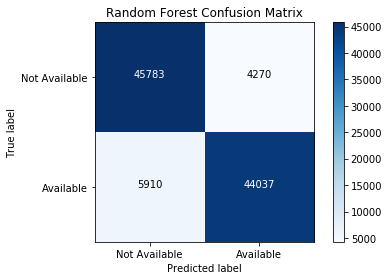

In [144]:
rf_cm_develop2 = confusion_matrix(y_test_develop2, rf_test_preds_develop2)
plot_confusion_matrix(rf_cm_develop2, ['Not Available', 'Available'], 
                      "Random Forest Confusion Matrix")

Feature Ranking RandomForestClassifier:
1. price_x: 0.364972
2. number_of_reviews: 0.132354
3. weekday: 0.104013
4. bedrooms: 0.030999
5. host_is_superhost: 0.017364
6. hill: 0.016687
7. property_type_House: 0.012297
8. room: 0.012128
9. location: 0.011872
10. property_type_Apartment: 0.011506
11. cancellation_policy_moderate: 0.011393
12. cancellation_policy_flexible: 0.011268
13. cancellation_policy_strict: 0.011098
14. private: 0.011097
15. city: 0.010975
16. queen: 0.010840
17. bedroom: 0.010334
18. downtown: 0.010299
19. bath: 0.010218
20. capitol: 0.009258
21. home: 0.009144
22. fremont: 0.009081
23. anne: 0.008630
24. room_type_Entire home/apt: 0.008501
25. apartment: 0.008431
26. house: 0.008034
27. suite: 0.008014
28. spacious: 0.007618
29. seattle: 0.007610
30. view: 0.007511
31. uw: 0.007460
32. room_type_Private room: 0.007364
33. heart: 0.007359
34. cozy: 0.007204
35. lake: 0.006852
36. modern: 0.006742
37. ballard: 0.006413
38. bed: 0.005896
39. studio: 0.005378
40. apt: 

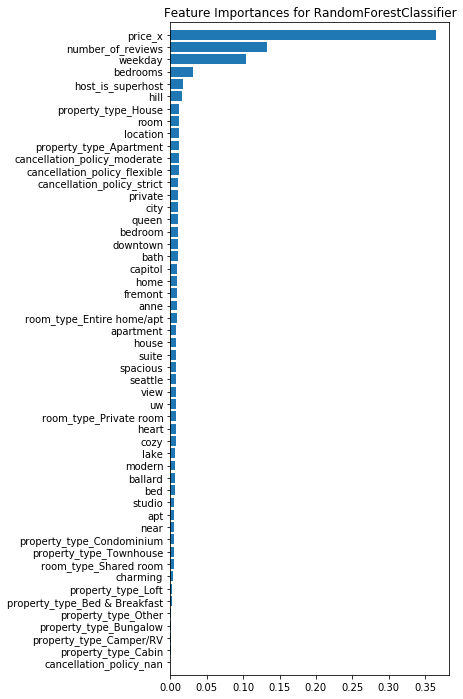

In [145]:
wordcount_feature_names = list(rf_pipeline_wordcount.named_steps['wordcount']._vocab.keys())
full_features = [col for col in keep_cols if col != 'name'] + wordcount_feature_names
plot_feature_importance(rf_pipeline_wordcount, full_features, fig_size=(5, 12))